# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

# Importing necessary libraries and data

In [3]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [4]:
# Common Libraries
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import scipy.stats as stats # mathematical algorithms and convenience functions
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
from scipy.stats import zscore

# Command to tell Python to actually display the graphs
%matplotlib inline 
sns.set_style('whitegrid') # set style for visualization
import warnings # ignore warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.2f' % x) # To supress numerical display in scientific notations

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


#Statistical Tests
from statsmodels.stats.weightstats import ztest # Z-test
from scipy import stats # T-test
from scipy.stats import chisquare, chi2_contingency # Chi-Square
from scipy.stats import f_oneway # ANOVA (Analysis of Variance)
from scipy.stats import mannwhitneyu # Mann-Whitney U Test
from scipy.stats import wilcoxon # Wilcoxon Signed-Rank Test
from scipy.stats import kruskal # Kruskal-Wallis H Test
from scipy.stats import levene # Levene's Test

# Supervised Learning
import statsmodels.stats.multicomp as stats_sm # statistical models, statistical tests, and statistical data exploration
import statsmodels.stats.proportion as stats_sp # statistical models, statistical tests, and statistical data exploration
from sklearn.model_selection import train_test_split # For randomized data splitting
import statsmodels.api as sm # To build logistic regression_model

# Linear & Logistic regression
from sklearn.linear_model import LinearRegression #To build linear regression_model
from statsmodels.tools.tools import add_constant #To build linear regression_model
from statsmodels.stats.outliers_influence import variance_inflation_factor #To check multicollinearity
import statsmodels.stats.api as sms #To check Heteroscedasticity
from statsmodels.compat import lzip #To check Heteroscedasticity
import pylab # QQ plot
import scipy.stats as stats # QQ plot
from sklearn.linear_model import LogisticRegression


# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

#To build CART model
from sklearn.tree import DecisionTreeClassifier #for classification
from sklearn.tree import DecisionTreeRegressor #for Regression
from sklearn import tree


#For randomized data splitting
from sklearn.model_selection import train_test_split

# To tune different models
from sklearn.model_selection import GridSearchCV


# Metric scores
from sklearn.metrics import (
    mean_absolute_error, 
    mean_squared_error,
    r2_score,
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
    classification_report
)


In [5]:
#dataset read
path1='C:\\Users\\otroc\\OneDrive\\Documents\\Carlos\\Training\\DSBA\\Python\\Datasets\\EasyVisa.csv'
df = pd.read_csv(path1)

# Data Overview

- Observations
- Sanity checks

In [6]:
df.head() # preview a sample first 5 rows

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.20,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.86,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.03,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.39,Year,Y,Certified


In [7]:
df.tail() # preview a sample last 5 rows

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


## Notes
* Many categorical variables. Feature engeeniering will be needed
* The variable of interedt is "case_status", is a categorical variable indicating if the Visa was "certified" or "denied". Then it is a **classification problem**

In [8]:
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.") # number of observations and features

There are 25480 rows and 12 columns.


In [9]:
df.dtypes # data types

case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [11]:
df.duplicated().sum() # Checking for duplicate entries in the data

0

In [12]:
# Missing values
df.isnull().sum() # Checking for missing values in the data

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

## Notes
* Categorical variables are object type
* There are 25480 rows and 12 column
* No duplicated nor missing valueses

In [13]:
df.describe(include="all").T # statistical summary of the data.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.00,NaN,NaN,NaN,5667.04,22877.93,-26.00,1022.00,2109.00,3504.00,602069.00
yr_of_estab,25480.00,NaN,NaN,NaN,1979.41,42.37,1800.00,1976.00,1997.00,2005.00,2016.00
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.00,NaN,NaN,NaN,74455.81,52815.94,2.14,34015.48,70308.21,107735.51,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Notes
* There is at an employer declaring a negative number of employees (no_of_employees = -26)
* There is at an employer declaring the company was established on year 1800 (yr_of_estab)

In [14]:
df.nunique() # Checking for number of variations in the data

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

In [15]:
# Uniques
for i in df.columns: # Checking uniques
    print (i,": ",df[i].unique())

case_id :  ['EZYV01' 'EZYV02' 'EZYV03' ... 'EZYV25478' 'EZYV25479' 'EZYV25480']
continent :  ['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']
education_of_employee :  ['High School' "Master's" "Bachelor's" 'Doctorate']
has_job_experience :  ['N' 'Y']
requires_job_training :  ['N' 'Y']
no_of_employees :  [14513  2412 44444 ... 24335 48785 40224]
yr_of_estab :  [2007 2002 2008 1897 2005 2012 1994 1924 1995 2004 1963 2006 1987 1991
 2001 1972 2013 1968 1884 1981 1997 2009 1998 1880 2000 2010 1965 1909
 2011 1989 1933 1960 2003 1976 1996 1847 1935 1890 1999 1838 1947 1939
 1970 1977 1982 1943 1956 1864 1974 1985 1984 1971 1913 1969 1818 1839
 1914 1988 1944 1855 1975 1966 1801 1920 1925 1993 1992 1979 1986 1931
 1962 1954 1868 1859 1946 1950 1869 1917 2014 1980 1896 1949 1843 1850
 1906 1961 1951 1958 1912 1983 1948 1945 1978 1898 1923 1911 1851 1865
 1849 1872 1967 1926 1873 1848 2015 1889 1876 1852 1938 1973 1959 1927
 1990 1930 1922 1940 1878 1934 1834 1928 1800 1861

In [16]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist() # Making a list of all categorical variables

In [17]:
# List categories
for column in cat_cols:
    print(df[column].value_counts())
    print("-" * 50)

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

In [18]:
# List categories
for column in cat_cols:
    print(df[column].value_counts(normalize=True))
    print("-" * 50)

EZYV01      0.00
EZYV16995   0.00
EZYV16993   0.00
EZYV16992   0.00
EZYV16991   0.00
            ... 
EZYV8492    0.00
EZYV8491    0.00
EZYV8490    0.00
EZYV8489    0.00
EZYV25480   0.00
Name: case_id, Length: 25480, dtype: float64
--------------------------------------------------
Asia            0.66
Europe          0.15
North America   0.13
South America   0.03
Africa          0.02
Oceania         0.01
Name: continent, dtype: float64
--------------------------------------------------
Bachelor's    0.40
Master's      0.38
High School   0.13
Doctorate     0.09
Name: education_of_employee, dtype: float64
--------------------------------------------------
Y   0.58
N   0.42
Name: has_job_experience, dtype: float64
--------------------------------------------------
N   0.88
Y   0.12
Name: requires_job_training, dtype: float64
--------------------------------------------------
Northeast   0.28
South       0.28
West        0.26
Midwest     0.17
Island      0.01
Name: region_of_employment, d

## Notes
* "case_id" variable has 100% unique values, no adding value to modeling
* Employee are coming mainly from Asia (66%) and have a level of education above High School (87%)
* 58% of employees have work experience and only 12% declare to require job training
* Only 1% declare "Islands" as the intended region of employment in the US
* case_status have the following distribution: 67% Certified and 33% Denied

# Consolidated notes on Data Overview
* Many categorical variables. Feature engeeniering will be needed
* The variable of interedt is "case_status", is a categorical variable indicating if the Visa was "certified" or "denied". Then it is a **classification problem**
* Categorical variables are object type
* There are 25480 rows and 12 columns
* No duplicated nor missing values
* There is at an employer declaring a negative number of employees (no_of_employees = -26)
* There is at an employer declaring the company was established on year 1800 (yr_of_estab)
* "case_id" variable has 100% unique values, no adding value to modeling
* Employee are coming mainly from Asia (66%) and have a level of education above High School (87%)
* 58% of employees have work experience and only 12% declare to require job training
* Only 1% declare "Islands" as the intended region of employment in the US
* case_status have the following distribution: 67% Certified and 33% Denied


# Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?
2. How does the visa status vary across different continents?
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

## Exploratory Data Analysis Functions

## Notes
* Functions:
	* univariate_numerical(data): Function to generate two plots for each numerical variable. Histplot for variable distribution. Boxplot for statistical summary
	* univariate_categorical(data): Function to generate countplot for each categorical variable. Labeled with count and percentage
	* plot_crosstab_bar_count(df, var_interest): Function to create a barplot of crosstab of the variable of interest vs each of the rest of catagorical variables. Labeled with counts
	* plot_crosstab_heat_perc(df, var_interest): Function to create a heatmap of crosstab of the variable of interest vs each of the rest of catagorical variables. Labeled with counts, percentage by row, percentage by column.
	* hist_box_cat(data, category_col): Function to generate four plots for each numerical variable related to a categorical variable. Histplot and Boxplot of numerical variable whith category 0. Histplot and Boxplot of numerical variable whith category 1.

In [637]:
def univariate_numerical(data):
    '''
    Function to generate two plots for each numerical variable
    Histplot for variable distribution
    Boxplot for statistical summary 
    '''
    # Select numerical columns
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    
    # Determine the number of rows and columns
    num_vars = len(numerical_cols)
    num_cols = 4
    num_rows = int(np.ceil(num_vars * 2 / num_cols))
    
    # Create a figure with the specified size
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, num_rows * 5))
    
    # Flatten the axes array for easy iteration
    axes = axes.flatten()
    
    # Plot each variable with a histplot and a boxplot
    for i, col in enumerate(numerical_cols):
        mean_value = data[col].mean()
        
        # Histplot with KDE
        sns.histplot(data[col], kde=True, ax=axes[i*2])
        axes[i*2].axvline(mean_value, color='r', linestyle='--')
        axes[i*2].set_title(f'Distribution of {col}')
        axes[i*2].text(mean_value, axes[i*2].get_ylim()[1]*0.8, f'Mean: {mean_value:.2f}', color='r', va='baseline', ha='left',rotation=90)
        
        # Boxplot
        sns.boxplot(y=data[col], ax=axes[i*2 + 1])
        axes[i*2 + 1].axhline(mean_value, color='r', linestyle='--')
        axes[i*2 + 1].set_title(f'Boxplot of {col}')
        axes[i*2 + 1].text(axes[i*2 + 1].get_xlim()[1]*0.8, mean_value, f'mean: {mean_value:.2f}', color='r', va='baseline', ha='right')
    
    # Hide any remaining empty subplots
    for j in range(num_vars * 2, len(axes)):
        fig.delaxes(axes[j])
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

In [638]:
def univariate_categorical(data):
    '''
    Function to generate countplot for each categorical variable
    Labeled with count and percentage
    '''
    # List of categorical columns
    categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Number of columns in the grid
    num_cols = 4
    
    # Calculate the number of rows needed
    num_rows = (len(categorical_columns) + num_cols - 1) // num_cols
    
    # Create the grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, num_rows * 5), constrained_layout=True)
    axes = axes.flatten()
    
    # Plot each countplot in the grid
    for i, col in enumerate(categorical_columns):
        ax = axes[i]
        plot = sns.countplot(x=col, data=data, order=data[col].value_counts().index, ax=ax)
        ax.set_title(f'Count of {col}')
           
        # Add total count and percentage annotations
        total = len(data)
        for p in plot.patches:
            height = p.get_height()
            percentage = f'{(height / total * 100):.1f}%'
            plot.text(x=p.get_x() + p.get_width() / 2,
                      y=height + 2,
                      s=f'{height:.0f}\n({percentage})',
                      ha='center')
        
        # Limit x-axis labels to avoid overlap
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Show the plot
    plt.show()


In [650]:
# Function to plot crosstab with labels
def plot_crosstab_bar_count(df, var_interest):
    '''
    Function to create a barplot of crosstab of the variable of interest vs each of the rest of categorical variables
    Labeled with counts
    '''
    # Extract categorical columns excluding the variable of interest
    cat_cols = df.select_dtypes(include=['category', 'object']).columns.tolist()
    cat_cols.remove(var_interest)
    
    # Determine the grid size
    num_vars = len(cat_cols)
    num_cols = 3  # Number of columns in the grid
    num_rows = (num_vars // num_cols) + int(num_vars % num_cols > 0)

    # Create a grid of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, num_rows * 5), constrained_layout=True)
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(cat_cols):
        # Create a crosstab
        crosstab = pd.crosstab(df[col], df[var_interest])
        
        # Plot the crosstab as a bar plot
        crosstab.plot(kind='bar', stacked=True, ax=axes[i])
        
        # Annotate counts in the middle of each bar section
        for bar in axes[i].patches:
            height = bar.get_height()
            if height > 0:
                axes[i].annotate(f'{int(height)}', 
                                 (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                                 ha='center', va='center', fontsize=10, color='black')
        
        # Add total labels at the top of each bar
        totals = crosstab.sum(axis=1)
        for j, total in enumerate(totals):
            axes[i].annotate(f'Total: {total}', 
                             (j, totals[j]), 
                             ha='center', va='bottom', weight='bold')

    # Hide any remaining empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Usage
#plot_crosstab_bar_count(df, var_interest='var_interest')


In [640]:
def plot_crosstab_heat_perc(df, var_interest):
    '''
    Function to create a heatmap of crosstab of the variable of interest vs each of the rest of catagorical variables
    Labeled with counts, percentage by row, percentage by column
    '''
    # Extract categorical columns excluding the variable of interest
    cat_cols = df.select_dtypes(include=['category', 'object']).columns.tolist()
    cat_cols.remove(var_interest)
    
    # Determine the grid size
    num_vars = len(cat_cols)
    num_cols = 3  # Number of columns in the grid
    num_rows = (num_vars // num_cols) + int(num_vars % num_cols > 0)

    # Create a grid of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, num_rows * 5))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(cat_cols):
        # Create crosstabs
        crosstab = pd.crosstab(df[col], df[var_interest])
        crosstab_perc_row = crosstab.div(crosstab.sum(axis=1), axis=0) * 100
        crosstab_perc_col = crosstab.div(crosstab.sum(axis=0), axis=1) * 100

        # Combine counts with percentages
        crosstab_combined = crosstab.astype(str) + "\n" + \
                            crosstab_perc_row.round(2).astype(str) + "%" + "\n" + \
                            crosstab_perc_col.round(2).astype(str) + "%"

        # Plot the crosstab as a heatmap
        sns.heatmap(crosstab, annot=crosstab_combined, fmt='', cmap='Blues', ax=axes[i], cbar=False)
        axes[i].set_title(f'Crosstab of {col} and {var_interest}')
        
    # Hide any remaining empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Usage
#plot_crosstab_grid(df, var_interest='var_interest')

In [641]:
# Histplot + Boxplot per variable per category
def hist_box_cat(data, category_col):
    '''
    Function to generate four plots for each numerical variable related to a categorical variable
    Histplot and Boxplot of numerical variable whith category 0
    Histplot and Boxplot of numerical variable whith category 1
    '''
    # Check if the category column exists in the dataframe
    if category_col not in data.columns:
        raise ValueError(f"Column '{category_col}' not found in the DataFrame")

    # Select numerical columns
    numerical_cols = data.select_dtypes(include=[np.number]).columns

    # Determine the number of rows and columns
    num_vars = len(numerical_cols)
    num_cols = 4
    num_rows = int(np.ceil(num_vars * 4 / num_cols))

    # Create a figure with the specified size
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, num_rows * 5))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Plot each variable with a histplot and a boxplot
    for i, col in enumerate(numerical_cols):
        mean_value_0 = data[data[category_col] == "Denied"][col].mean()
        mean_value_1 = data[data[category_col] == "Certified"][col].mean()

        # Histplot for category 0
        sns.histplot(data=data[data[category_col] == "Denied"], x=col, kde=True, ax=axes[i*4])
        axes[i*4].axvline(mean_value_0, color='r', linestyle='--')
        axes[i*4].set_title(f'Distribution of {col} ({category_col}: Denied)')
        axes[i*4].text(mean_value_0, axes[i*4].get_ylim()[1]*0.8, f'Mean: {mean_value_0:.2f}', color='r', va='baseline', ha='left', rotation=90)

        # Boxplot for category 0
        sns.boxplot(y=data[data[category_col] == "Denied"][col], ax=axes[i*4 + 1])
        axes[i*4 + 1].axhline(mean_value_0, color='r', linestyle='--')
        axes[i*4 + 1].set_title(f'Boxplot of {col} ({category_col}: Denied)')
        axes[i*4 + 1].text(axes[i*4 + 1].get_xlim()[1]*0.8, mean_value_0, f'Mean: {mean_value_0:.2f}', color='r', va='baseline', ha='right')

        # Histplot for category 1
        sns.histplot(data=data[data[category_col] == "Certified"], x=col, kde=True, ax=axes[i*4 + 2])
        axes[i*4 + 2].axvline(mean_value_1, color='r', linestyle='--')
        axes[i*4 + 2].set_title(f'Distribution of {col} ({category_col}: Certified)')
        axes[i*4 + 2].text(mean_value_1, axes[i*4 + 2].get_ylim()[1]*0.8, f'Mean: {mean_value_1:.2f}', color='r', va='baseline', ha='left', rotation=90)

        # Boxplot for category 1
        sns.boxplot(y=data[data[category_col] == "Certified"][col], ax=axes[i*4 + 3])
        axes[i*4 + 3].axhline(mean_value_1, color='r', linestyle='--')
        axes[i*4 + 3].set_title(f'Boxplot of {col} ({category_col}: Certified)')
        axes[i*4 + 3].text(axes[i*4 + 3].get_xlim()[1]*0.8, mean_value_1, f'Mean: {mean_value_1:.2f}', color='r', va='baseline', ha='right')

    # Hide any remaining empty subplots
    for j in range(num_vars * 4, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Example usage:
# hist_box_cat(data, 'category')

## Exploratory Data Analysis

In [19]:
data=df.copy()

In [20]:
data.drop(['case_id'], axis=1, inplace=True)

In [21]:
# Convert object to category
cols = data.select_dtypes(['object'])
for i in cols.columns:
    data[i] = data[i].astype('category')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 797.7 KB


In [23]:
data[data['no_of_employees']<=0]['no_of_employees'].value_counts()

-11    9
-14    8
-26    7
-25    5
-17    4
Name: no_of_employees, dtype: int64

In [24]:
data[data['no_of_employees']<=0]['no_of_employees'].value_counts().sum()

33

In [25]:
data=data[data['no_of_employees']>0]

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25447 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25447 non-null  category
 1   education_of_employee  25447 non-null  category
 2   has_job_experience     25447 non-null  category
 3   requires_job_training  25447 non-null  category
 4   no_of_employees        25447 non-null  int64   
 5   yr_of_estab            25447 non-null  int64   
 6   region_of_employment   25447 non-null  category
 7   prevailing_wage        25447 non-null  float64 
 8   unit_of_wage           25447 non-null  category
 9   full_time_position     25447 non-null  category
 10  case_status            25447 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 995.3 KB


In [27]:
data[data['yr_of_estab']==1800]['yr_of_estab'].value_counts()

1800    16
Name: yr_of_estab, dtype: int64

In [28]:
data[data['yr_of_estab']<1900]['yr_of_estab'].value_counts().sum()

2108

## Notes. Exploratory Data Analysis
* Deleted variable with unique values
* Changed data type from object to category
* Checked the case with -26 employees. Is not a single case. There are 7 cases with -26 employes and 33 cases in total with negative number of employees. Those are droped from data.
* Checked the case of company establishment in year 1800 . Is not a single case. There are 16 companies declaring stablishment on 1800 and 2108 companies from 1800 to 1899. No changes on data.

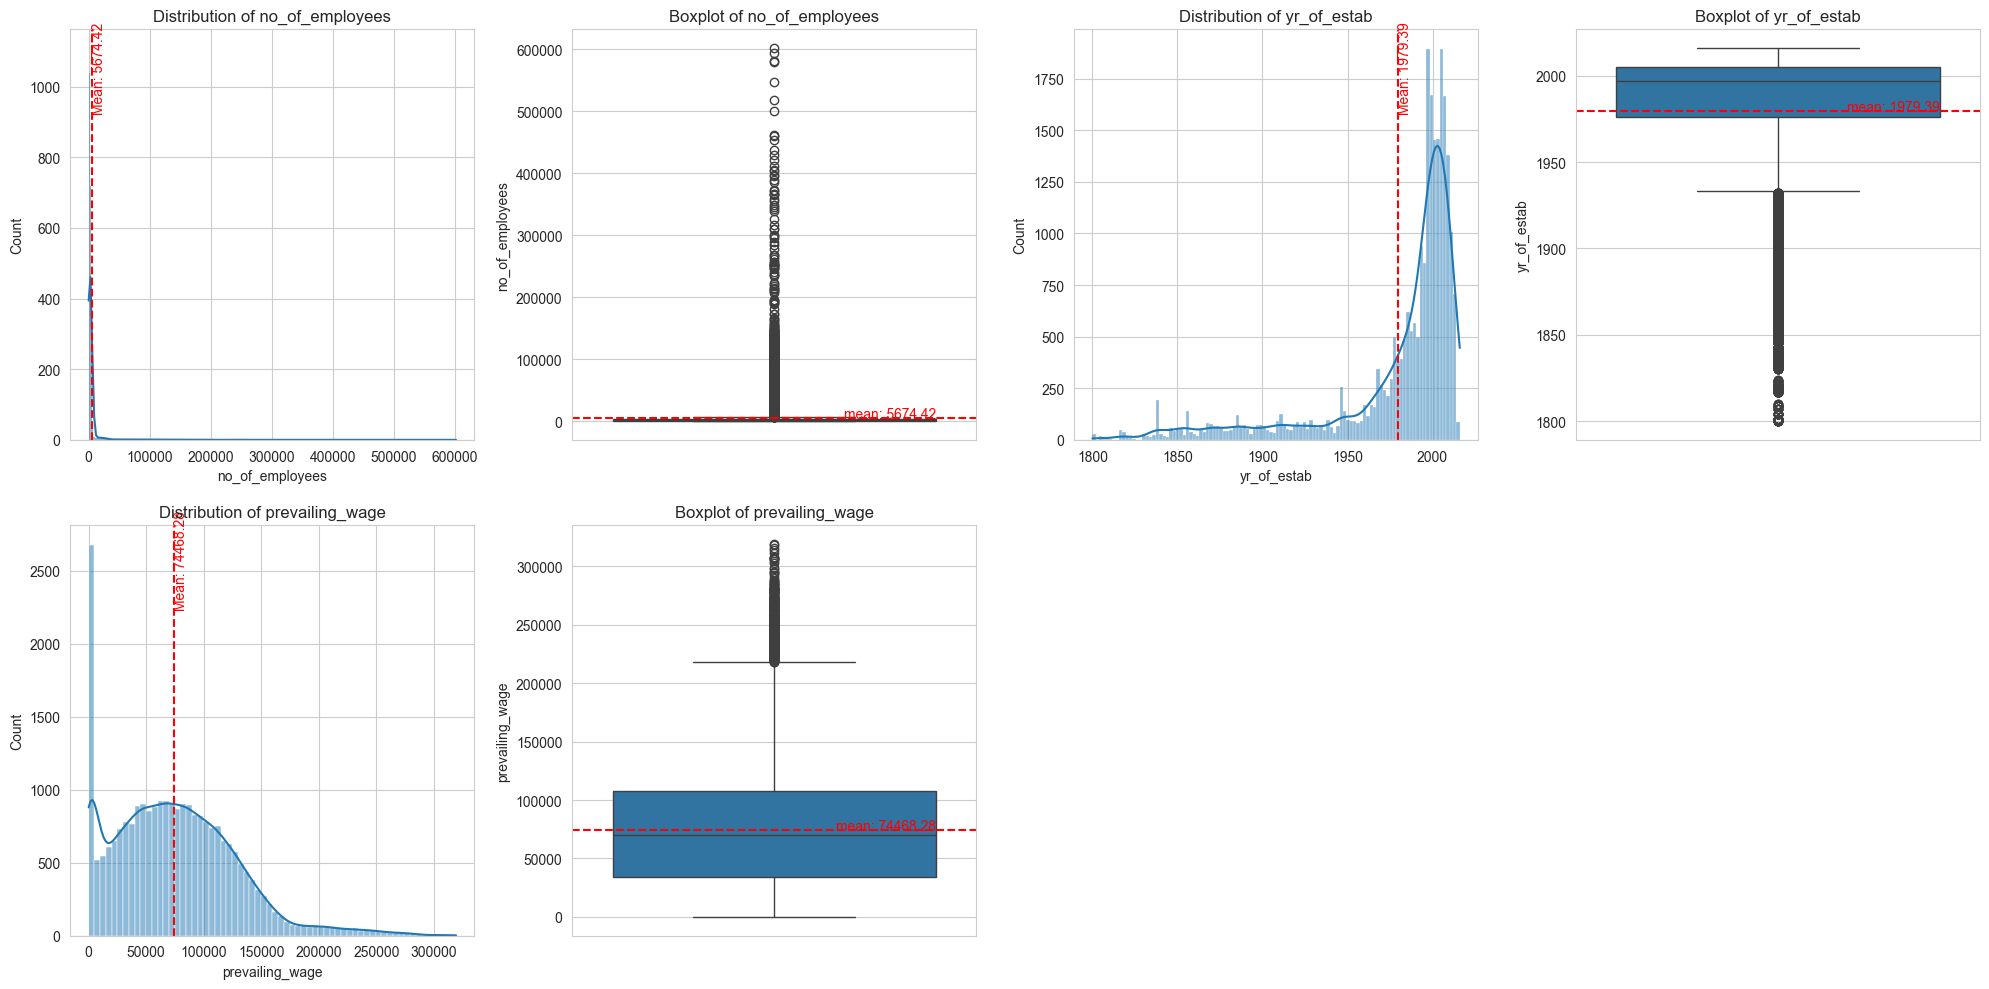

In [642]:
univariate_numerical(data)

## Notes. Univariate Analysis. Numerical variables
* no_of_employees have a highly right sqewed distribution with many outliers with companies declaring up to 600K employees. This cases are considered to represent real data and not to be droped as outliers.
* The year in which the employer's company was established have a left squewed distribution, with the year 1979 as the median and with many cases from 1800's as outliers. This cases are considered to represent real data and not to be droped as outliers.
* The average wage paid variable require transformation, because the unit of prevailing wage migh vary among Hourly, Weekly, Monthly, and Yearly. 


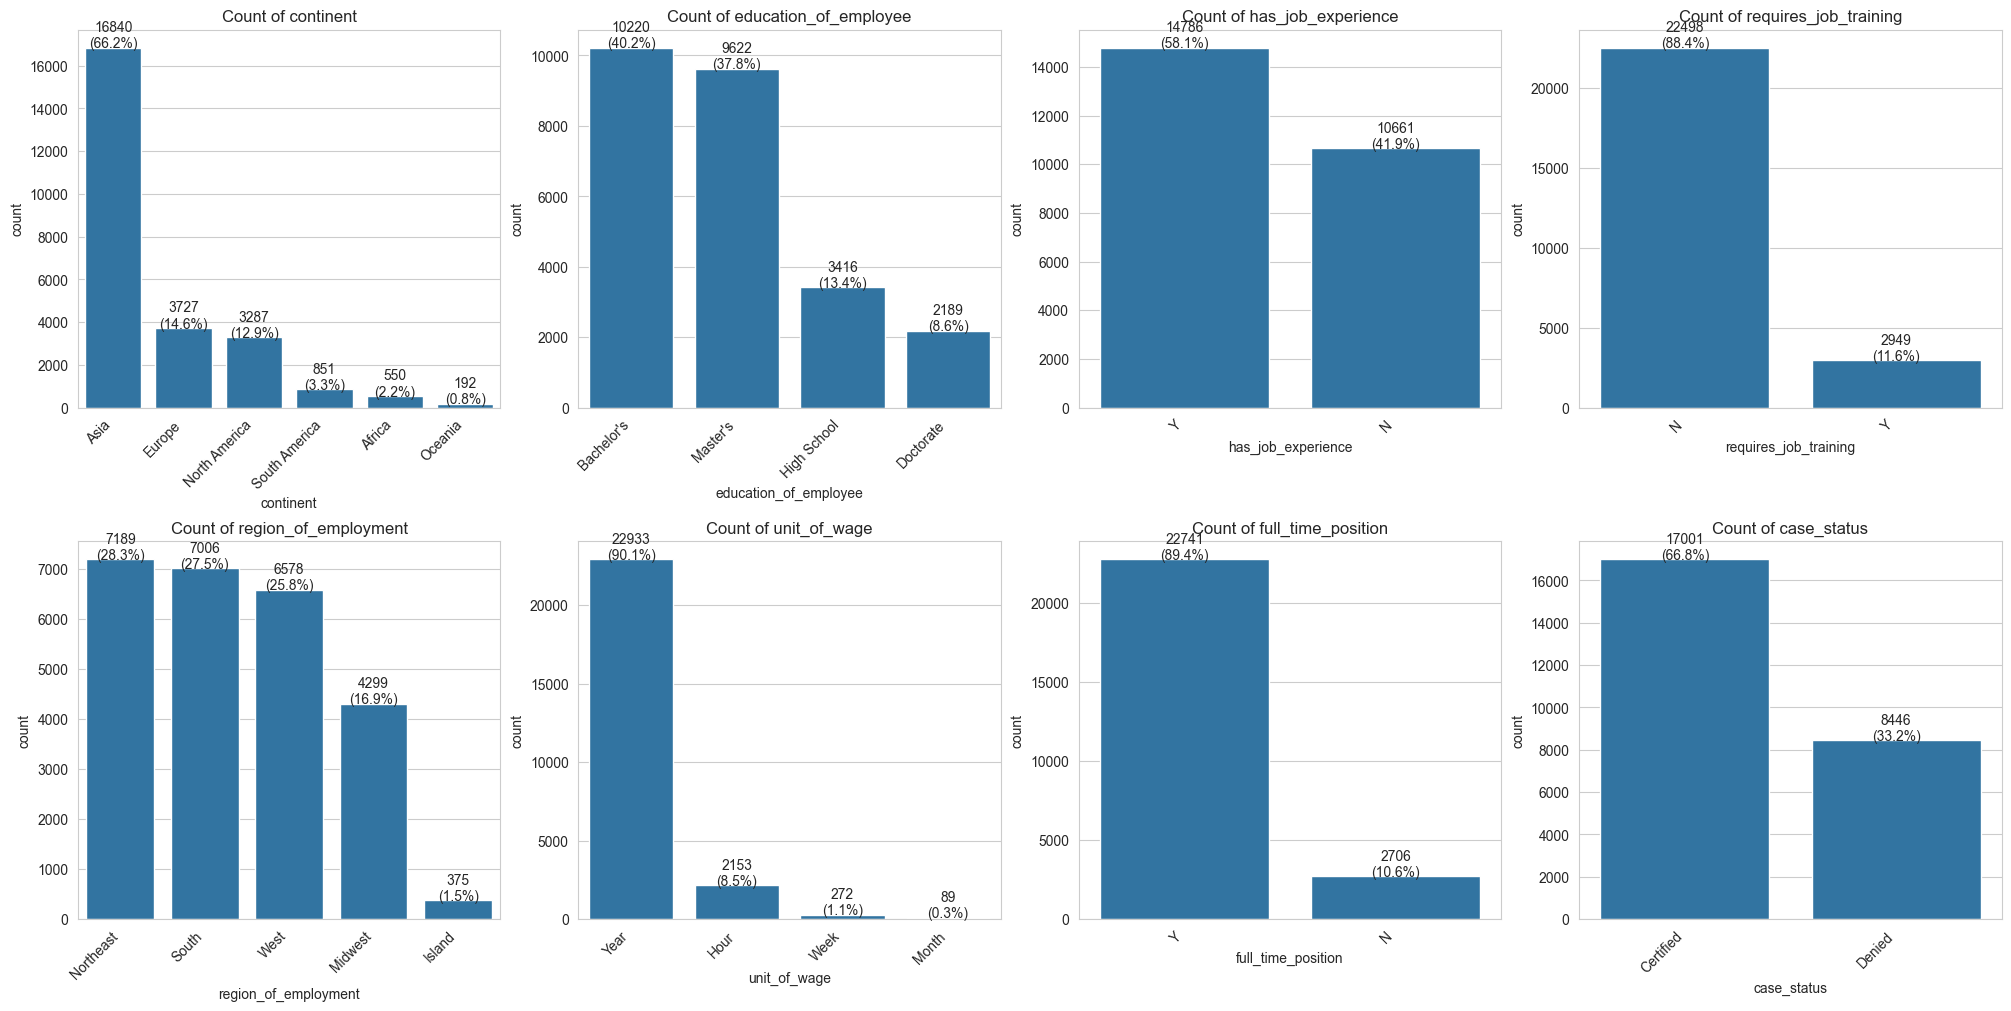

In [643]:
 univariate_categorical(data)

## Notes. Univariate Analysis. Categorical variables
* Asia is the dominant origin of employees with 66.2% of cases, then Europe with 14.6%) North America (assumed referred to Canada and Mexico) with 12.9%.
* Only 11.6% of aplicants declare to require training, considering 41.9% declare to have no job experience, it might be related to high level of education with 13.4% High Scool and 86.6% declare higer educational levels.
* Foreign worker's intended region of employment in the US is quite even among all regions, except the "Islands" region representing only the 1.5% of intention.


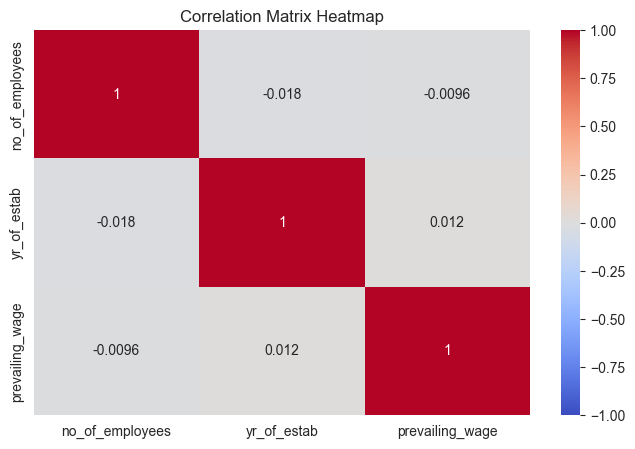

In [625]:
# Calculate correlation matrix
corr_matrix = data.corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

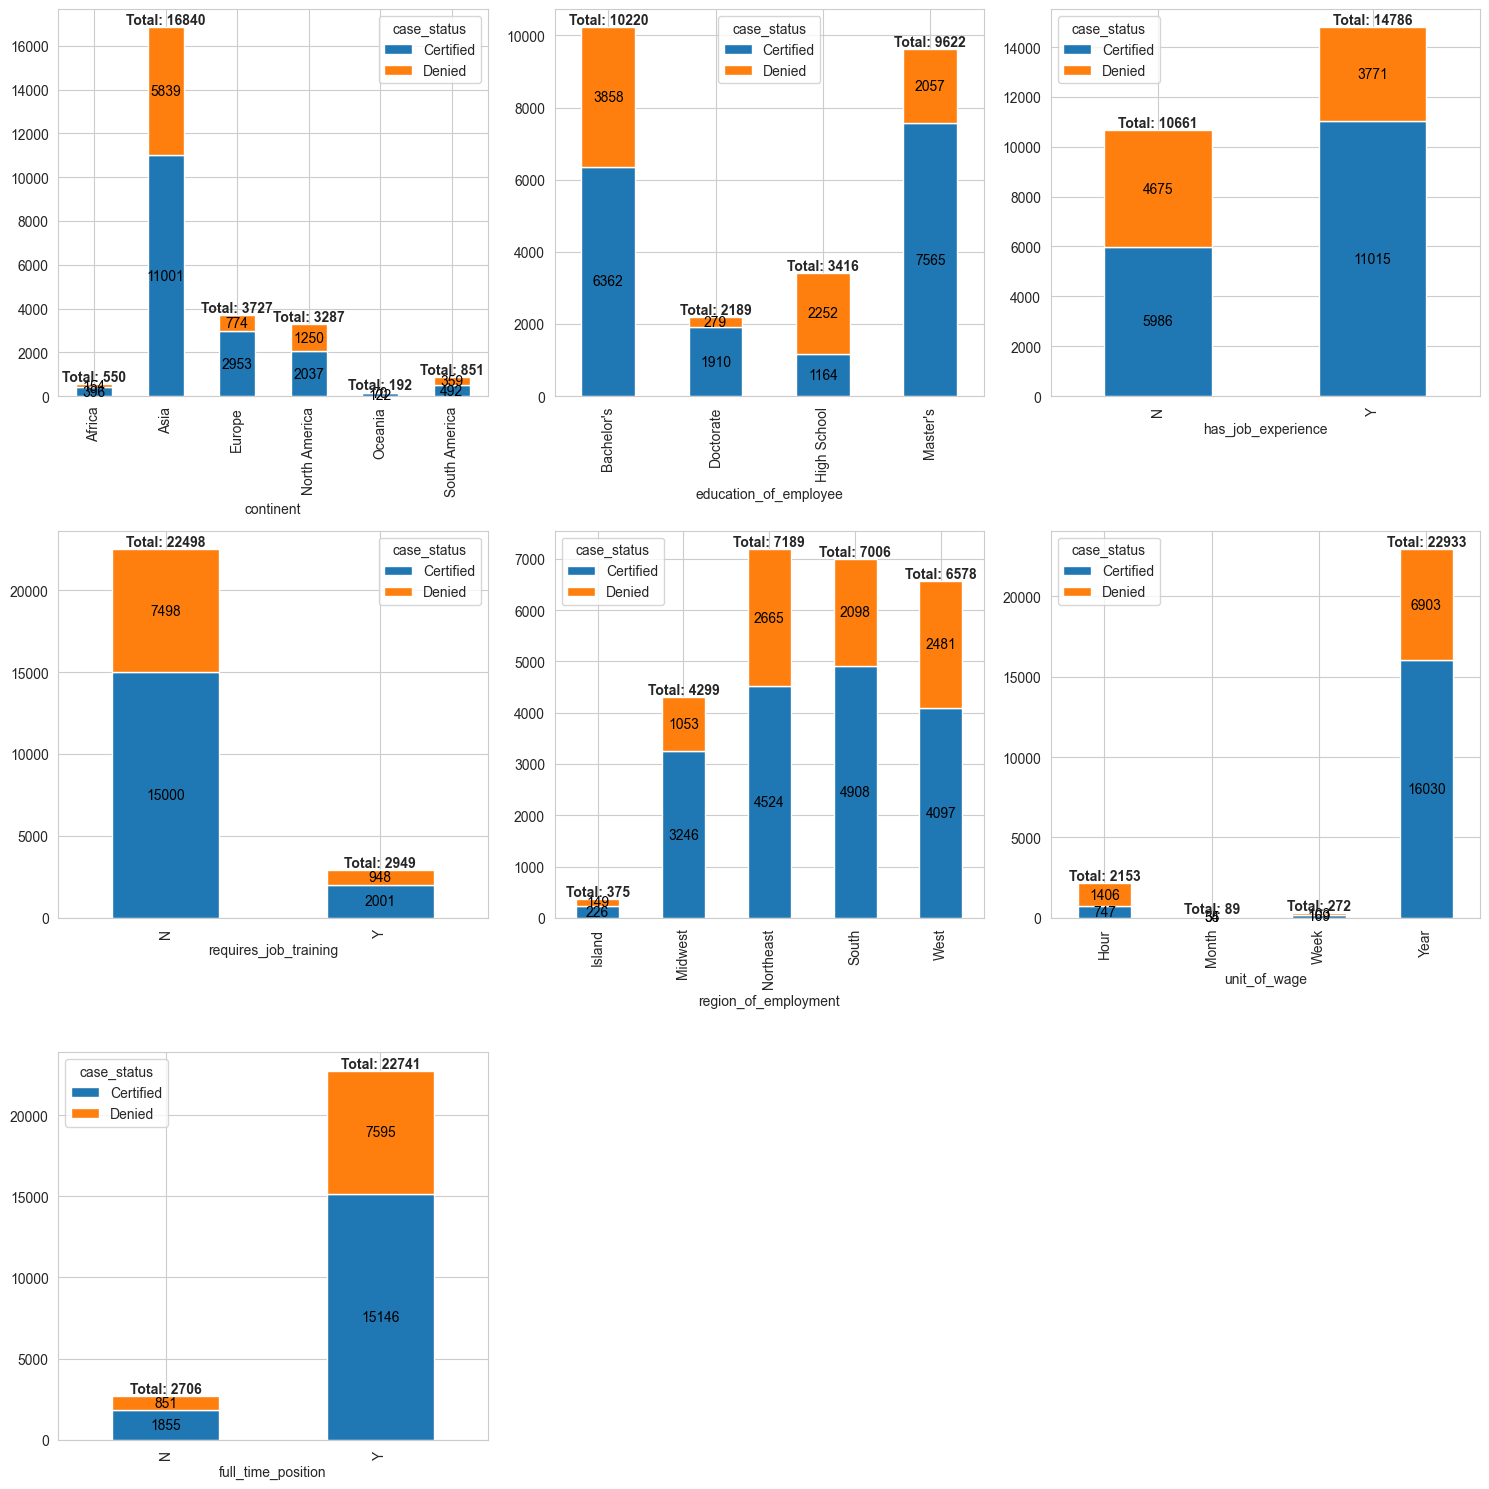

In [651]:
plot_crosstab_bar_count(data, 'case_status')

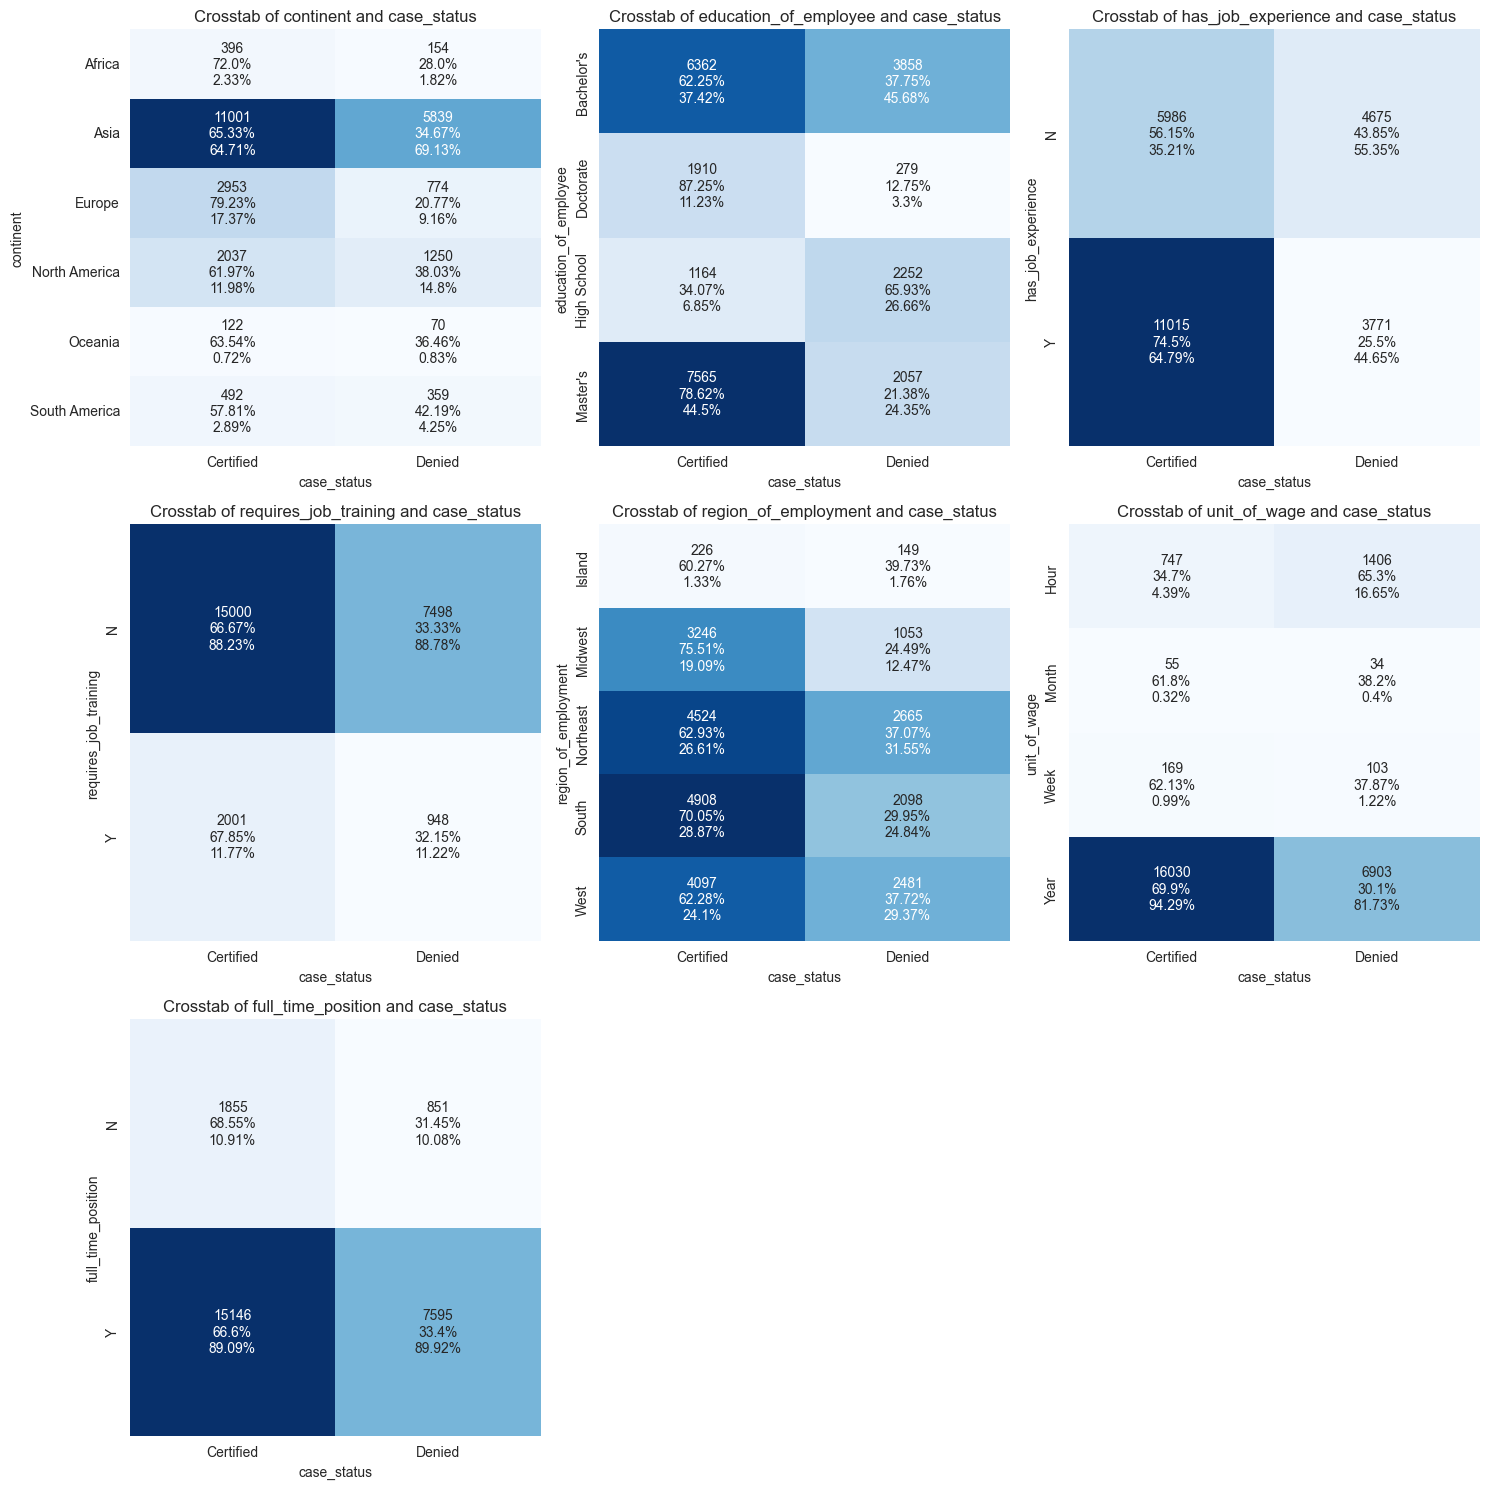

In [645]:
plot_crosstab_heat_perc(data, var_interest='case_status')

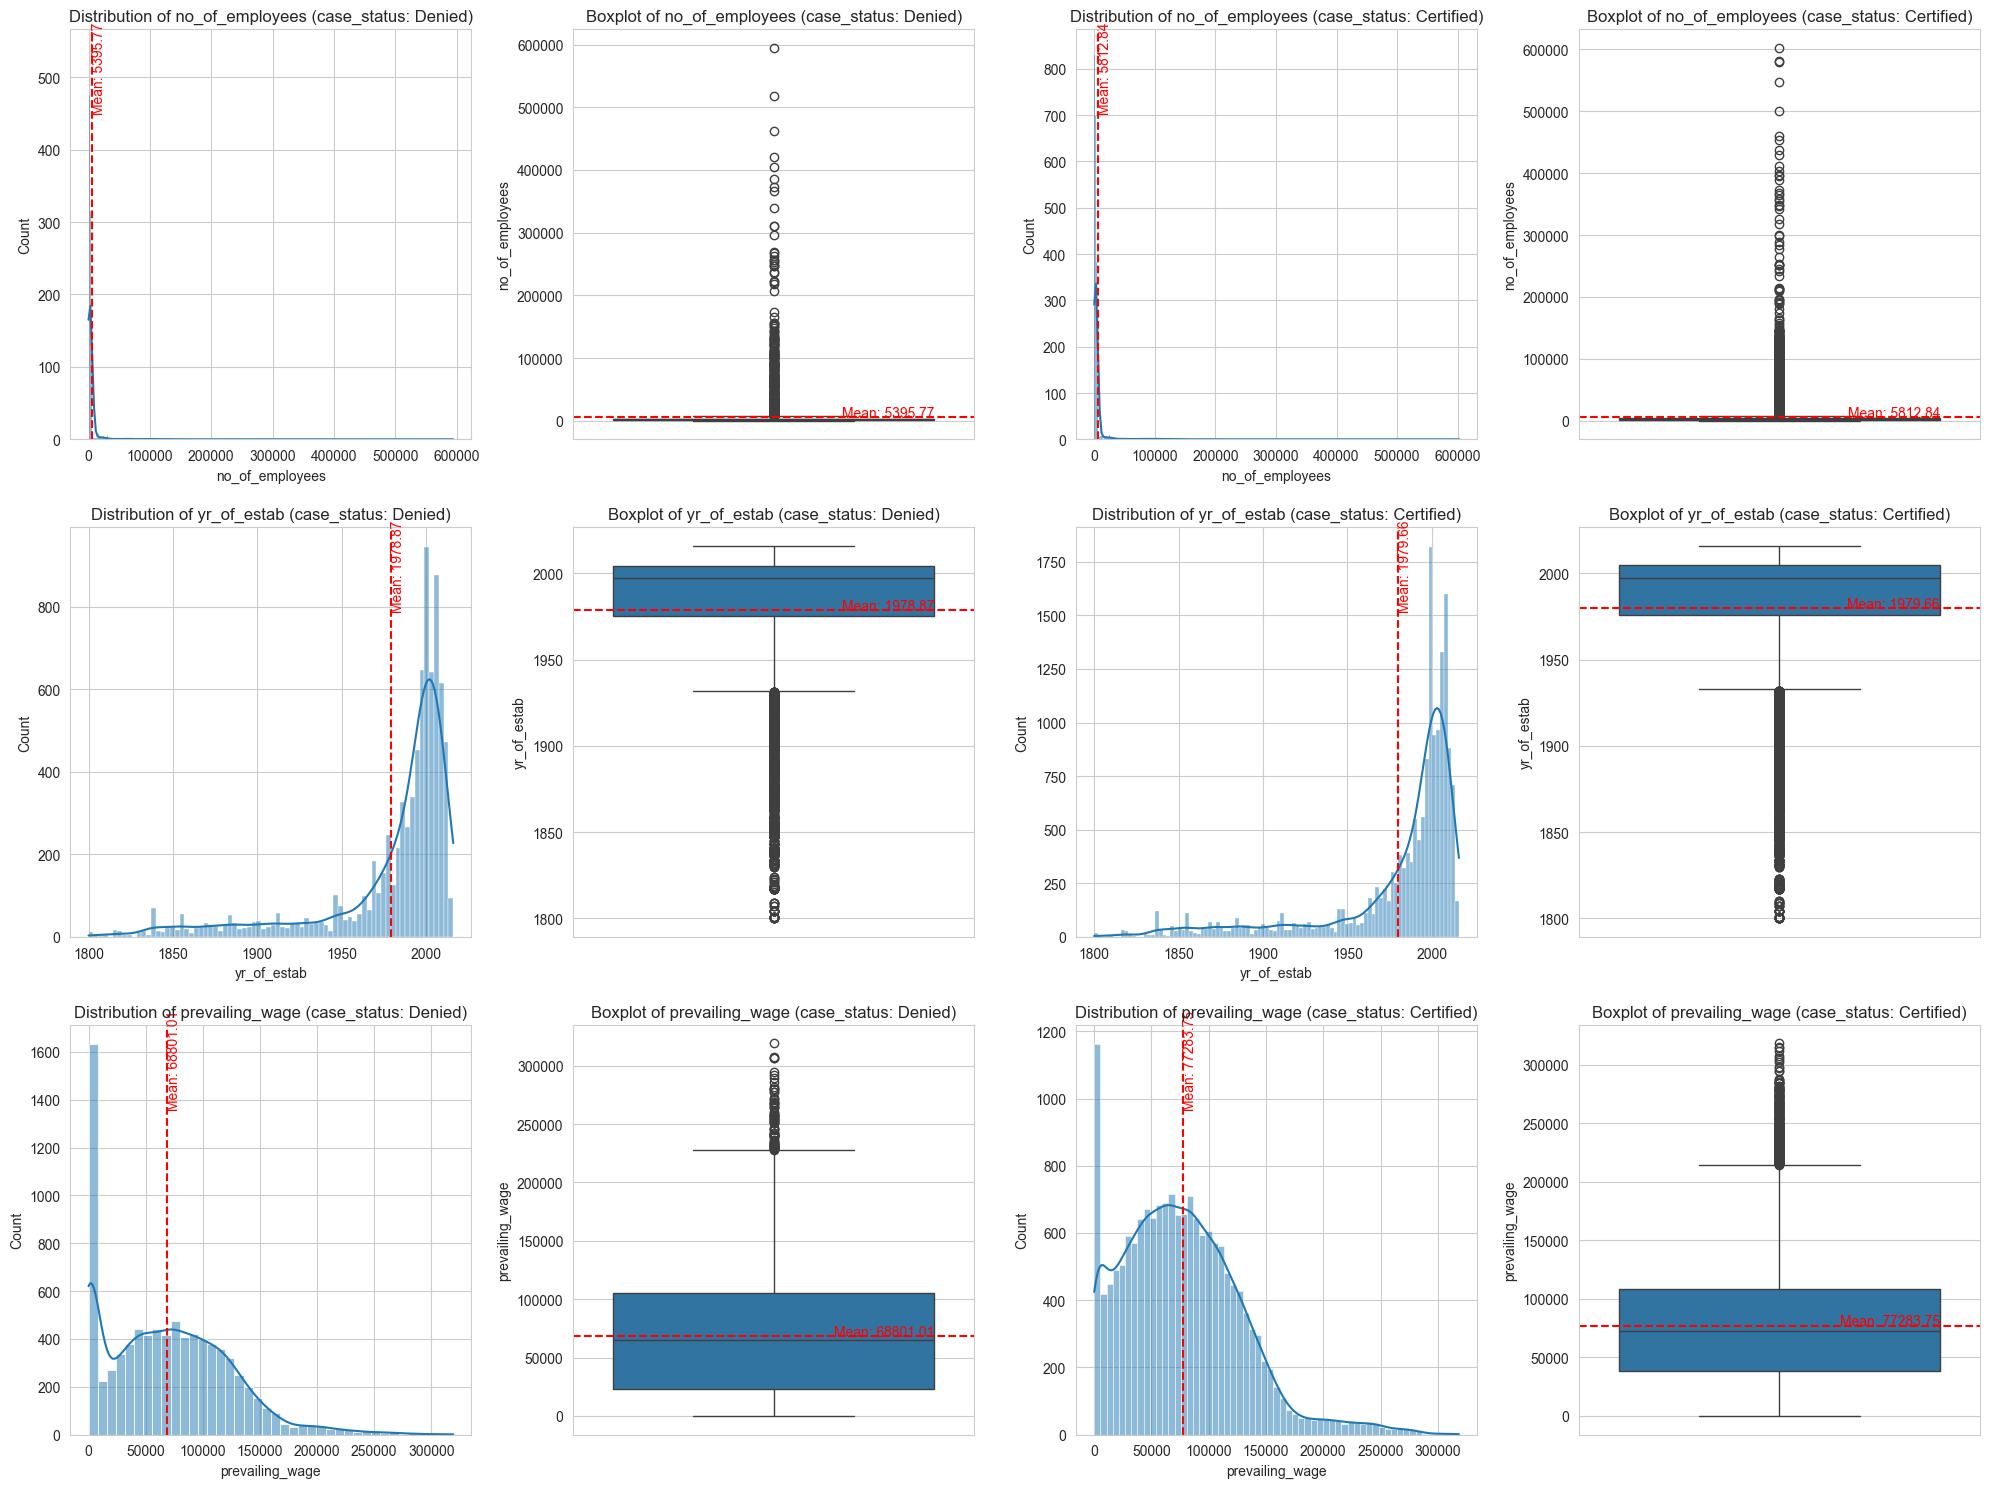

In [646]:
hist_box_cat(data, 'case_status')

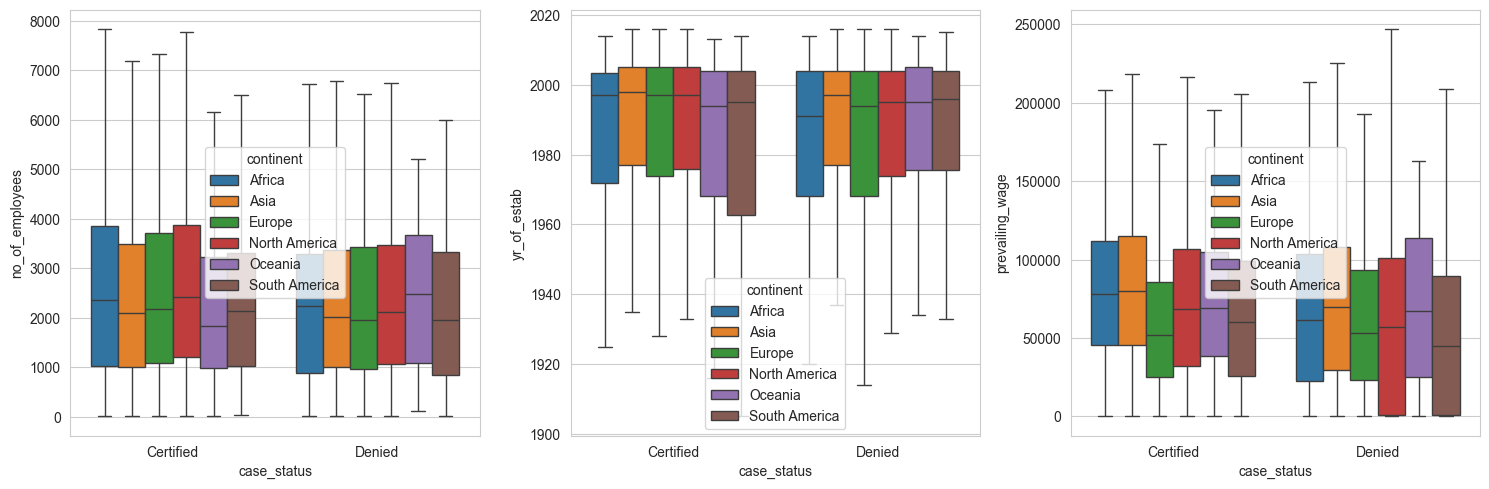

In [52]:
# Boxplots
f, axs = plt.subplots(1, 3, figsize=(15, 5),gridspec_kw=dict(width_ratios=[1,1,1]))
sns.boxplot(data, x='case_status',y='no_of_employees', hue='continent',ax=axs[0],showfliers=False);
sns.boxplot(data, x='case_status',y='yr_of_estab', hue='continent',ax=axs[1],showfliers=False);
sns.boxplot(data, x='case_status',y='prevailing_wage', hue='continent',ax=axs[2],showfliers=False);
f.tight_layout()

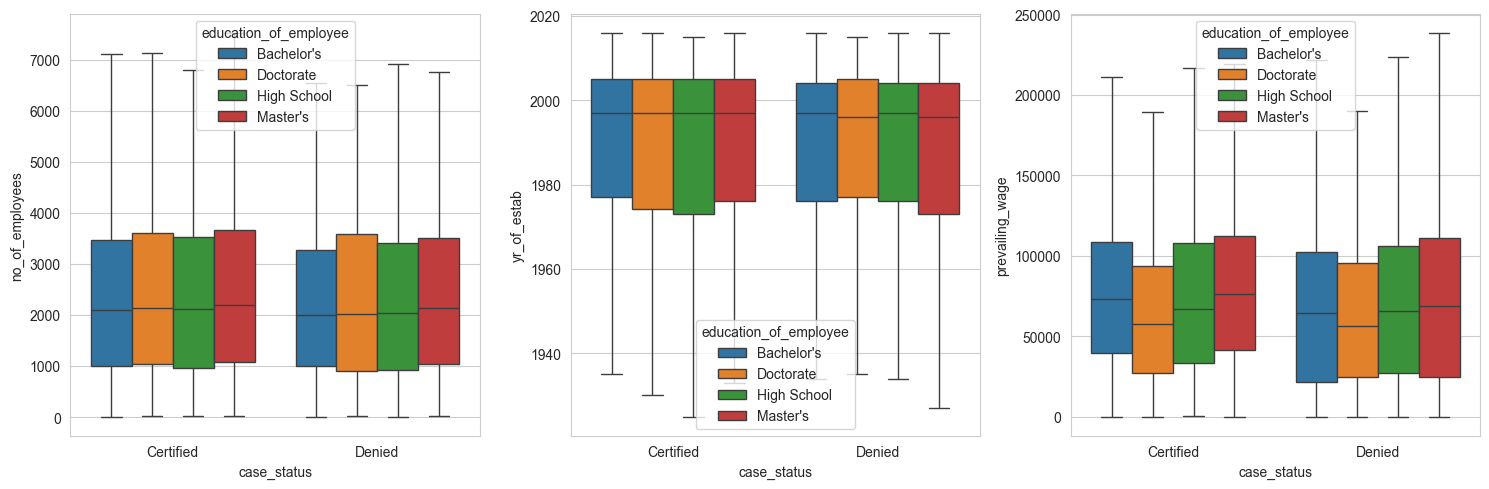

In [53]:
# Boxplots
f, axs = plt.subplots(1, 3, figsize=(15, 5),gridspec_kw=dict(width_ratios=[1,1,1]))
sns.boxplot(data, x='case_status',y='no_of_employees', hue='education_of_employee',ax=axs[0],showfliers=False);
sns.boxplot(data, x='case_status',y='yr_of_estab', hue='education_of_employee',ax=axs[1],showfliers=False);
sns.boxplot(data, x='case_status',y='prevailing_wage', hue='education_of_employee',ax=axs[2],showfliers=False);
f.tight_layout()

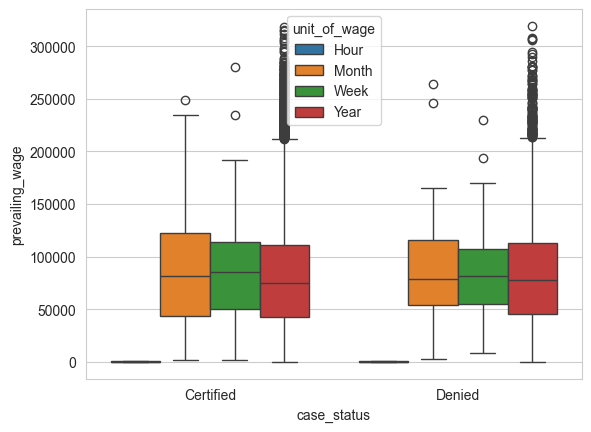

In [55]:
sns.boxplot(data, x='case_status',y='prevailing_wage', hue='unit_of_wage');

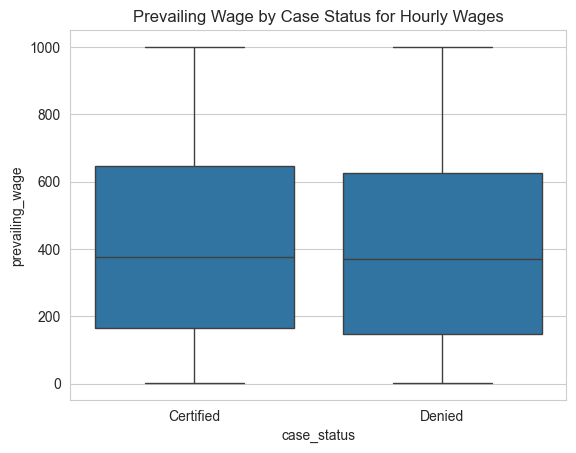

In [56]:
ax=sns.boxplot(data[data['unit_of_wage']=="Hour"], x='case_status',y='prevailing_wage');
ax.set_title('Prevailing Wage by Case Status for Hourly Wages');

In [57]:
data[data['unit_of_wage']=="Hour"]['prevailing_wage'].describe()

count   2153.00
mean     414.77
std      275.05
min        2.14
25%      152.70
50%      373.20
75%      637.31
max      999.92
Name: prevailing_wage, dtype: float64

In [58]:

data[data['unit_of_wage']!="Hour"]['prevailing_wage'].describe()

count    23294.00
mean     81312.84
std      49943.37
min        100.00
25%      43860.93
50%      76257.68
75%     111414.45
max     319210.27
Name: prevailing_wage, dtype: float64

## Notes. Bivariate Analysis
* There is no important correlation among numerical variables
* European employees has the better certification rating with 79%
* The education level has an importance on certification. From the total certified employees, the lower education level (High School) counts for 5%.
* 2 out of 3 employees with High School does not get certified, while 87% of aplicants with Doctorate level of education get certified
* Job experience has an impact on certification. 65% of those certified has job experience, and from the employees with experience, 74% gets certified.
* Job training has an impact on certification. 88% of those certified has job training, and from the employees with training, 67% gets certified.
* Region of origing might have no impact on certification because the demmand is quite even among the regions around 20% each, being the only exception the Island region with 1% of demand. For all regions around 2 out of 3 visa requets gets certified.
* The most likely pay unit to be certified for a visa is Yearly wage with 94% of certified cases (and 82% of denied cases).
* 89% of certified cases are for those with full time position.
* The mean prevailing wage for those certified is 68.801USD, while for those not certified is 77283USD. Higher prevailing wages might have an impact on certification. 
* The number of employees, the year of establishment, and prevailing wage doesn't seem to have an impact on certifications.
* The prevailing_wage seems to be "annualized" across all wage_unit, except for the "Hour" wage unit with a mean of 414USD (looks more like a daily wage value), while for the rest of the units it is 81,312USD (making sense to an anual wage value)
* Additionally the range of wage under the wage unit "Hour" appears to be misclassified and includes both "Hour" and "day" (unexisting level on original data) with minimums of 2.14USD (attributable to an hourly wage) and maximun of 999USD (attributable to daily wage)

# Consolidated notes on Exploratory Data Analysis (EDA)
* Functions:
	* univariate_numerical(data): Function to generate two plots for each numerical variable. Histplot for variable distribution. Boxplot for statistical summary
	* univariate_categorical(data): Function to generate countplot for each categorical variable. Labeled with count and percentage
	* plot_crosstab_bar_count(df, var_interest): Function to create a barplot of crosstab of the variable of interest vs each of the rest of catagorical variables. Labeled with counts
	* plot_crosstab_heat_perc(df, var_interest): Function to create a heatmap of crosstab of the variable of interest vs each of the rest of catagorical variables. Labeled with counts, percentage by row, percentage by column.
	* hist_box_cat(data, category_col): Function to generate four plots for each numerical variable related to a categorical variable. Histplot and Boxplot of numerical variable whith category 0. Histplot and Boxplot of numerical variable whith category 1.
* Deleted variable with unique values
* Changed data type from object to category
* Checked the case with -26 employees. Is not a single case. There are 7 cases with -26 employes and 33 cases in total with negative number of employees. Those are droped from data.
* Checked the case of company establishment in year 1800 . Is not a single case. There are 16 companies declaring stablishment on 1800 and 2108 companies from 1800 to 1899. No changes on data.
* no_of_employees have a highly right sqewed distribution with many outliers with companies declaring up to 600K employees. This cases are considered to represent real data and not to be droped as outliers.
* The year in which the employer's company was established have a left squewed distribution, with the year 1979 as the median and with many cases from 1800's as outliers. This cases are considered to represent real data and not to be droped as outliers.
* The average wage paid variable require transformation, because the unit of prevailing wage migh vary among Hourly, Weekly, Monthly, and Yearly. 
* Asia is the dominant origin of employees with 66.2% of cases, then Europe with 14.6%) North America (assumed referred to Canada and Mexico) with 12.9%.
* Only 11.6% of aplicants declare to require training, considering 41.9% declare to have no job experience, it might be related to high level of education with 13.4% High Scool and 86.6% declare higer educational levels.
* Foreign worker's intended region of employment in the US is quite even among all regions, except the "Islands" region representing only the 1.5% of intention.
* There is no important correlation among numerical variables
* European employees has the better certification rating with 79%
* The education level has an importance on certification. From the total certified employees, the lower education level (High School) counts for 5%.
* 2 out of 3 employees with High School does not get certified, while 87% of aplicants with Doctorate level of education get certified
* Job experience has an impact on certification. 65% of those certified has job experience, and from the employees with experience, 74% gets certified.
* Job training has an impact on certification. 88% of those certified has job training, and from the employees with training, 67% gets certified.
* Region of origing might have no impact on certification because the demmand is quite even among the regions around 20% each, being the only exception the Island region with 1% of demand. For all regions around 2 out of 3 visa requets gets certified.
* The most likely pay unit to be certified for a visa is Yearly wage with 94% of certified cases (and 82% of denied cases).
* 89% of certified cases are for those with full time position.
* The mean prevailing wage for those certified is 68.801USD, while for those not certified is 77283USD. Higher prevailing wages might have an impact on certification. 
* The number of employees, the year of establishment, and prevailing wage doesn't seem to have an impact on certifications.
* The prevailing_wage seems to be "annualized" across all wage_unit, except for the "Hour" wage unit with a mean of 414USD (looks more like a daily wage value), while for the rest of the units it is 81,312USD (making sense to an anual wage value)
* Additionally the range of wage under the wage unit "Hour" appears to be misclassified and includes both "Hour" and "day" (unexisting level on original data) with minimums of 2.14USD (attributable to an hourly wage) and maximun of 999USD (attributable to daily wage)

# Anwers to leading questions
1) Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? **R: YES**<br>
* The education level has an importance on certification. From the total certified employees, the lower education level (High School) counts for 5%.
* 2 out of 3 employees with High School does not get certified, while 87% of aplicants with Doctorate level of education get certified

2) How does the visa status vary across different continents? **R:**<br>
* European employees has the better certification rating with 79%

3) Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? **R: YES**<br>
* Job experience has an impact on certification. 65% of those certified has job experience, and from the employees with experience, 74% gets certified.

4) In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? **R: Yearly Wage**<br>
* The most likely pay unit to be certified for a visa is Yearly wage with 94% of certified cases (and 82% of denied cases).

5) The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage? **R:**<br>
* The mean prevailing wage for those certified is 68.801USD, while for those not certified is 77283USD. Higher prevailing wages might have an impact on certification. 

# Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [318]:
data2=data.copy()

In [319]:
# Check Outliers
for column in data2.select_dtypes(include=np.number).columns:
    outliers=len(data2[(data2[column] < data2[column].quantile(0.25)-1.5*(data2[column].quantile(0.75)-data2[column].quantile(0.25))) | (data2[column] > data2[column].quantile(0.75)+1.5*(data2[column].quantile(0.75)-data2[column].quantile(0.25)))][column])
    print(f'{column}: {outliers} outliers')

no_of_employees: 1556 outliers
yr_of_estab: 3259 outliers
prevailing_wage: 427 outliers


## Notes
* There are no missing values 
* no_of_employees: 1556 outliers. Related to companies with a very bigger or smaller number of employees vs the median. Not to be droped from data.
* yr_of_estab: 3259 outliers. Related to companies established before 1900 . Not to be droped from data.
* prevailing_wage: 427 outliers. Related to hourly wage, not will be treated as outlier but to be transformd.


In [320]:
# Checking categories of wage units.
data2["unit_of_wage"].value_counts()

Year     22933
Hour      2153
Week       272
Month       89
Name: unit_of_wage, dtype: int64

In [321]:
# Fair wage ranges to check maping of 'prevailing_wage' with 'unit_of_wage'
hour_wage=75
day_wage=600
week_wage=2500
month_wage=15000

In [322]:
# Creating level "Day" on categorical variable 'unit_of_wage'
data2['unit_of_wage'] = data2['unit_of_wage'].cat.add_categories(['Day'])

In [323]:
data2["unit_of_wage"].value_counts()

Year     22933
Hour      2153
Week       272
Month       89
Day          0
Name: unit_of_wage, dtype: int64

In [352]:
# Reclassification of wages by units_of_wage fair ranges

#checking "Hour" level with defined range up to hour_wage
data2["unit_of_wage"][(data2["prevailing_wage"]<=hour_wage)].value_counts()

Hour     138
Month      0
Week       0
Year       0
Day        0
Name: unit_of_wage, dtype: int64

In [325]:
#checking "Day" level with defined range from hour_wage to day_wage
data2["unit_of_wage"][(data2["prevailing_wage"]>hour_wage)&(data2["prevailing_wage"]<=day_wage)].value_counts()

Hour     1411
Year       64
Month       0
Week        0
Day         0
Name: unit_of_wage, dtype: int64

In [326]:
# map values to "day" level
data2.loc[(data2["prevailing_wage"]>hour_wage)&(data2["prevailing_wage"]<=day_wage), 'unit_of_wage'] = 'Day'

In [327]:
data2["unit_of_wage"].value_counts()

Year     22869
Day       1475
Hour       742
Week       272
Month       89
Name: unit_of_wage, dtype: int64

In [328]:
#checking "Week" level with defined range from day_wage to week_wage
data2["unit_of_wage"][(data2["prevailing_wage"]>day_wage)&(data2["prevailing_wage"]<=week_wage)].value_counts()

Hour     604
Year     179
Month      1
Week       1
Day        0
Name: unit_of_wage, dtype: int64

In [329]:
# map values to "week" level
data2.loc[(data2["prevailing_wage"]>day_wage)&(data2["prevailing_wage"]<=week_wage), 'unit_of_wage'] = 'Week'

In [330]:
data2["unit_of_wage"].value_counts()

Year     22690
Day       1475
Week      1056
Hour       138
Month       88
Name: unit_of_wage, dtype: int64

In [331]:
#checking "Month" level with defined range from week_wage to month_wage
data2["unit_of_wage"][(data2["prevailing_wage"]>week_wage)&(data2["prevailing_wage"]<=month_wage)].value_counts()

Year     1332
Week        8
Month       6
Hour        0
Day         0
Name: unit_of_wage, dtype: int64

In [332]:
# map values to "Month" level
data2.loc[(data2["prevailing_wage"]>week_wage)&(data2["prevailing_wage"]<=month_wage), 'unit_of_wage'] = 'Month'

In [333]:
data2["unit_of_wage"].value_counts()

Year     21358
Day       1475
Month     1428
Week      1048
Hour       138
Name: unit_of_wage, dtype: int64

In [334]:
#checking "Year" level with defined range from month_wage onwards
data2["unit_of_wage"][(data2["prevailing_wage"]>month_wage)].value_counts()

Year     21358
Week       263
Month       82
Hour         0
Day          0
Name: unit_of_wage, dtype: int64

In [335]:
# map values to "Year" level
data2.loc[(data2["prevailing_wage"]>month_wage), 'unit_of_wage'] = 'Year'

In [336]:
data2["unit_of_wage"].value_counts()

Year     21703
Day       1475
Month     1346
Week       785
Hour       138
Name: unit_of_wage, dtype: int64

In [337]:
data["unit_of_wage"].value_counts()

Year     22933
Hour      2153
Week       272
Month       89
Name: unit_of_wage, dtype: int64

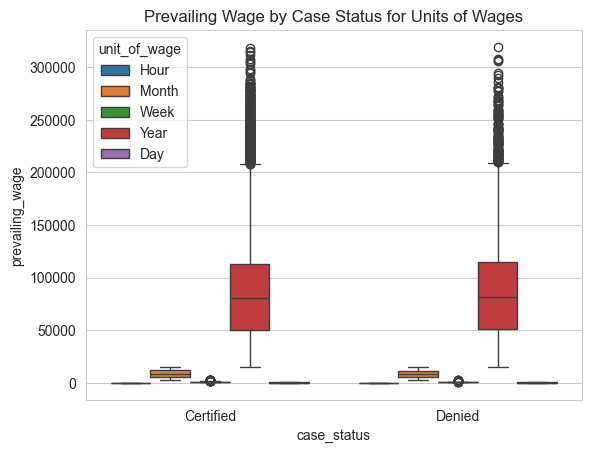

In [338]:
ax=sns.boxplot(data2, x='case_status',y='prevailing_wage', hue='unit_of_wage');
ax.set_title('Prevailing Wage by Case Status for Units of Wages');

## Notes
* Created category "Day" for unit_of_wage
* Defined "fair wage" ranges to check maping of 'prevailing_wage' with 'unit_of_wage': hour_wage up to 75, day_wage from 75 to 600, week_wage from 600 to 3000 and month_wage from 3000 to 15000, year_wage from 15000 onwards.
* Reclassified data in fair range of hour_wage to unit_of_wage "hours".
* Reclassified data in fair range of day_wage to unit_of_wage "hour"
* Reclassified data in fair range of week_wage to unit_of_wage "Year"
* Reclassified data in fair range of month_wage to unit_of_wage "Month"
* Reclassified data in fair range of year_wage to unit_of_wage "Year"


In [339]:
data3=data2.copy()

In [351]:
#Annualization of wages according to units of wages

#Adjusting wage values for hour
data3.loc[data3['unit_of_wage']=="Hour",'prevailing_wage']=data2['prevailing_wage']*8*22*12

In [341]:
#Adjusting wage values for day
data3.loc[data3['unit_of_wage']=="Day",'prevailing_wage']=data2['prevailing_wage']*22*12

In [342]:
#Adjusting wage values for week
data3.loc[data3['unit_of_wage']=="Week",'prevailing_wage']=data2['prevailing_wage']*52

In [343]:
#Adjusting wage values for month
data3.loc[data3['unit_of_wage']=="Month",'prevailing_wage']=data2['prevailing_wage']*12

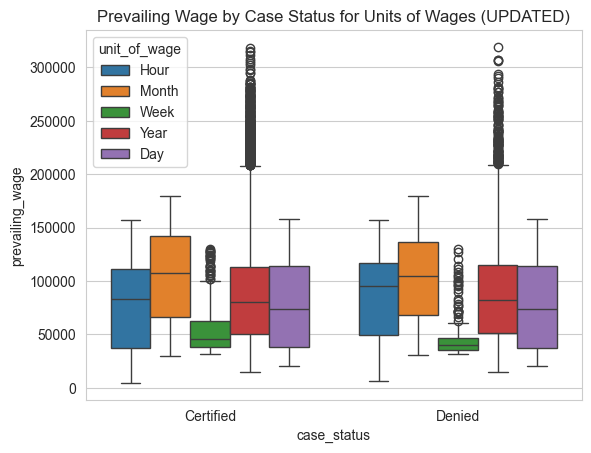

In [344]:
ax=sns.boxplot(data3, x='case_status',y='prevailing_wage', hue='unit_of_wage');
ax.set_title('Prevailing Wage by Case Status for Units of Wages (UPDATED)');

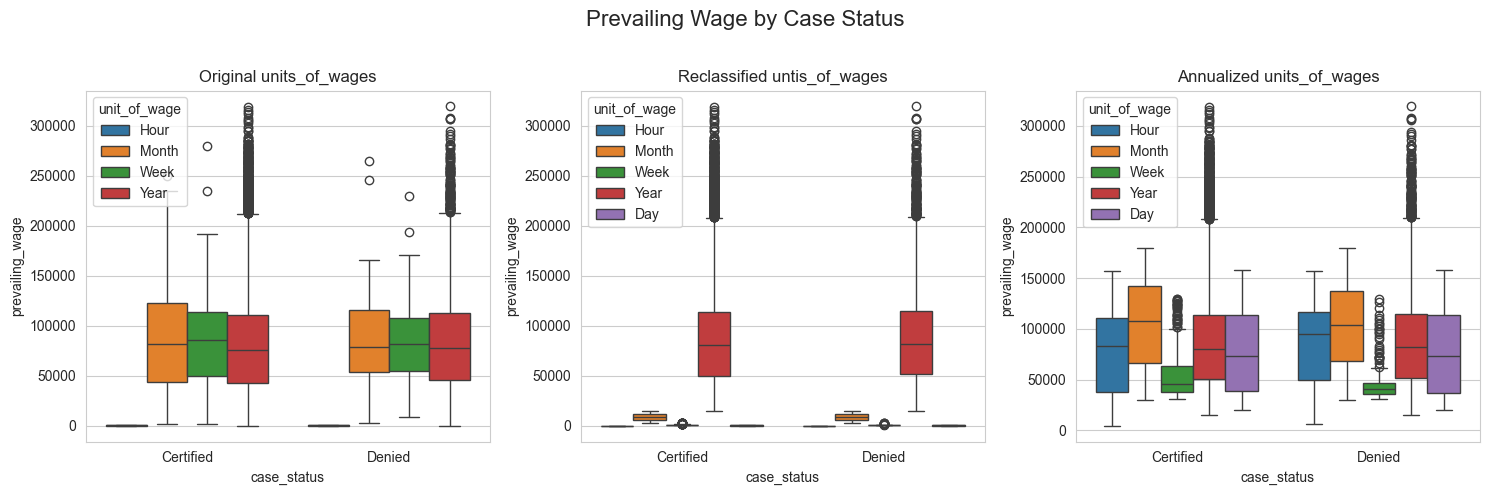

In [345]:
# Plotting
f, axs = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw=dict(width_ratios=[1, 1,1]))

# Subplot titles
axs[0].set_title('Original units_of_wages')
axs[1].set_title('Reclassified untis_of_wages')
axs[2].set_title('Annualized units_of_wages')

# Main plot title
f.suptitle('Prevailing Wage by Case Status', fontsize=16)

# Subplots
sns.boxplot(data, x='case_status',y='prevailing_wage', hue='unit_of_wage',ax=axs[0]);
sns.boxplot(data2, x='case_status',y='prevailing_wage', hue='unit_of_wage',ax=axs[1]);
sns.boxplot(data3, x='case_status',y='prevailing_wage', hue='unit_of_wage',ax=axs[2]);

# Adjust layout to make room for the main title
f.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

## Notes
* Annualized hourly wage to by applying factor 8x22x12
* Annualized daily wage to by applying factor 8x22x12
* Annualized weekly wage to by applying factor 8x22x12
* Annualized monthly wage to by applying factor 8x22x12

In [346]:
# Check Outliers
for column in data3.select_dtypes(include=np.number).columns:
    outliers=len(data3[(data3[column] < data3[column].quantile(0.25)-1.5*(data3[column].quantile(0.75)-data3[column].quantile(0.25))) | (data3[column] > data3[column].quantile(0.75)+1.5*(data3[column].quantile(0.75)-data3[column].quantile(0.25)))][column])
    print(f'{column}: {outliers} outliers')

no_of_employees: 1556 outliers
yr_of_estab: 3259 outliers
prevailing_wage: 470 outliers


In [347]:
data3['case_status']=data3['case_status'].map({'Certified':1, 'Denied':0})

In [348]:
data3.shape

(25447, 11)

## Preparing data for modeling

In [349]:
# specifying the independent  and dependent variables
X = data3.drop(['case_status'], axis=1)
Y = data3['case_status']

# creating dummy variables
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)
X = X.astype(float)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [350]:
# Checking training and test sets.
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17812, 22)
Shape of test set :  (7635, 22)
Percentage of classes in training set:
1   0.67
0   0.33
Name: case_status, dtype: float64
Percentage of classes in test set:
1   0.67
0   0.33
Name: case_status, dtype: float64



# Consolidated notes on Data Preprocessing
* There are no missing values 
* no_of_employees: 1556 outliers. Related to companies with a very bigger or smaller number of employees vs the median. Not to be droped from data.
* yr_of_estab: 3259 outliers. Related to companies established before 1900 . Not to be droped from data.
* prevailing_wage: 427 outliers. Related to hourly wage, not will be treated as outlier but to be transformed.
* created category "Day" for unit_of_wage
* Defined "fair wage" ranges to check maping of 'prevailing_wage' with 'unit_of_wage': hour_wage up to 75, day_wage from 75 to 600, week_wage from 600 to 3000 and month_wage from 3000 to 15000, year_wage from 15000 onwards.
* Reclassified data in fair range of hour_wage to unit_of_wage "hours".
* Reclassified data in fair range of day_wage to unit_of_wage "hour"
* Reclassified data in fair range of week_wage to unit_of_wage "Year"
* Reclassified data in fair range of month_wage to unit_of_wage "Month"
* Reclassified data in fair range of year_wage to unit_of_wage "Year"
* Annualized hourly wage to by applying factor 8x22x12
* Annualized daily wage to by applying factor 8x22x12
* Annualized weekly wage to by applying factor 8x22x12
* Annualized monthly wage to by applying factor 8x22x12

# EDA (pre-modeling)

- It is a good idea to explore the data once again after manipulating it.

In [353]:
data3.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,156341.57,Day,Y,0
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,1
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.86,Year,Y,0
3,Asia,Bachelor's,N,N,98,1897,West,83434.03,Year,Y,0
4,Africa,Master's,Y,N,1082,2005,South,149907.39,Year,Y,1


In [354]:
data3.tail()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,1
25476,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,1
25477,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,1
25478,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,1
25479,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,1


In [276]:
print("There are", data2.shape[0], 'rows and', data2.shape[1], "columns.") # number of observations and features

There are 25447 rows and 11 columns.


In [277]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25447 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25447 non-null  category
 1   education_of_employee  25447 non-null  category
 2   has_job_experience     25447 non-null  category
 3   requires_job_training  25447 non-null  category
 4   no_of_employees        25447 non-null  int64   
 5   yr_of_estab            25447 non-null  int64   
 6   region_of_employment   25447 non-null  category
 7   prevailing_wage        25447 non-null  float64 
 8   unit_of_wage           25447 non-null  category
 9   full_time_position     25447 non-null  category
 10  case_status            25447 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 2.0 MB


In [278]:
data2.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
continent,25447,6,Asia,16840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25447,4,Bachelor's,10220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25447,2,Y,14786,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25447,2,N,22498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25447.00,NaN,NaN,NaN,5674.42,22891.84,12.00,1025.00,2112.00,3506.50,602069.00
yr_of_estab,25447.00,NaN,NaN,NaN,1979.39,42.39,1800.00,1976.00,1997.00,2005.00,2016.00
region_of_employment,25447,5,Northeast,7189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25447.00,NaN,NaN,NaN,86001.15,46956.84,4512.71,48557.29,80055.33,114622.82,319210.27
unit_of_wage,25447,5,Year,21703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
full_time_position,25447,2,Y,22741,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Consolidated notes on EDA (pre-modeling)
Main changes from original data includes:
* Deleted 33 rows with negative values
* Created a new category level for variable unit_of_wage
* Reclassified prevailing_wage vs unit_of_wage
* Transformed (annualized) variable prevailing_wage for consistency with original data
* Encoded case_status ('Certified':1, 'Denied':1)
* Created dummy variables

# Model Performance Evaluation Functions

Model can make wrong predictions as:<br>
- False Positives
- False Negatives

Which case is more important?:<br>
- If we need to reduce False Negatives, we need to maximize RECALL
- If we need to reduce False Positives, we need to maximize PRECISION
- iF We need to reduce both False Negatives and False Positives, F1_SCORE should be maximized

# Consolidated notes on model performance evaluation
In this case:<br>
- False Positives means to predict VISA Certified for an employee whose VISA should be Denied
- False Negative means to predict VISA Denied for an employee whose VISA should be Certified
- Both cases have to be avoided as both have negative impact on the process of visa approvals.
- We need to reduce both False Negatives and False Positives, so **F1_SCORE should be maximized**

Functions:<br>
- classification_performance: Function to compute different metrics to check classification model performance aggregating function outputs into a performance dataframe
- plot_cm_train_test: Function to plot two confusion matrix. Allows to compare confusion matrix side by side. Present train AND test confusion matrix from ONE model.
- plot_cm_model1_model2: Function to plot two confusion matrix. Allows to compare confusion matrix side by side. Present train OR test confusion matrix from TWO models.


In [386]:
# Define a function to compute different metrics to check the performance of a classification model built using statsmodels
def classification_performance(model, predictors, target, description, df_perf=None, threshold=0.5):
    """
    Function to compute different metrics to check classification model performance
        model: classifier
        predictors: independent variables
        target: dependent variable
        description: description of the model        
        df_perf: existing dataframe to append the results to
        threshold: threshold for classifying the observation as class 1
    """
    # If df_perf is not provided, create an empty dataframe
    if df_perf is None:
        df_perf = pd.DataFrame(columns=["Model", "Accuracy", "Recall", "Precision", "F1"])
    
    # Checking which probabilities are greater than the threshold
    pred_temp = model.predict(predictors) > threshold
    # Rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # Compute Accuracy
    recall = recall_score(target, pred)  # Compute Recall
    precision = precision_score(target, pred)  # Compute Precision
    f1 = f1_score(target, pred)  # Compute F1-score
   
    # Append the new row with the provided metrics
    df_perf = df_perf.append(
        {"Model": description, "Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        ignore_index=True
    )
    return df_perf

In [368]:
def plot_cm_train_test(model, X_train, y_train, X_test, y_test, train_model_desc="Model_Train", test_model_desc="Model 1_Test", threshold=0.5):

    '''
    Function to plot two confusion matrix, 
    Allows to compare confusion matrix side by side 
    present train and test confusion matrix from a single model   
    '''
    
    # Predictions for model 1 Train
    pred1 = model.predict(X_train) > threshold
    pred1 = np.round(pred1)
    cm1 = confusion_matrix(y_train, pred1)

    # Predictions for model 1 Test
    pred2 = model.predict(X_test) > threshold
    pred2 = np.round(pred2)
    cm2 = confusion_matrix(y_test, pred2)

    # Calculate the percentages for model 1
    cm1_percentage = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis] * 100
    # Create labels with both counts and percentages for model 1
    labels1 = [f'{count}\n{percent:.2f}%' for count, percent in zip(cm1.flatten(), cm1_percentage.flatten())]
    labels1 = np.asarray(labels1).reshape(cm1.shape)

    # Calculate the percentages for model 2
    cm2_percentage = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis] * 100
    # Create labels with both counts and percentages for model 2
    labels2 = [f'{count}\n{percent:.2f}%' for count, percent in zip(cm2.flatten(), cm2_percentage.flatten())]
    labels2 = np.asarray(labels2).reshape(cm2.shape)

    # Plot side by side
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # Confusion matrix for model 1 Train
    sns.heatmap(cm1, annot=labels1, fmt="", cmap="Blues", ax=axes[0])
    axes[0].set_title(train_model_desc)
    axes[0].set_xlabel("Predicted Values")
    axes[0].set_ylabel("Actual Values")

    # Confusion matrix for model 1 Test
    sns.heatmap(cm2, annot=labels2, fmt="", cmap="Blues", ax=axes[1])
    axes[1].set_title(test_model_desc)
    axes[1].set_xlabel("Predicted Values")
    axes[1].set_ylabel("Actual Values")

    plt.tight_layout()
    plt.show()


In [399]:
def plot_cm_model1_model2(model1, model2, X_train1, X_train2, y_train, model1_desc="Model 1", model2_desc="Model 2", threshold=0.5):

    '''
    Function to plot two confusion matrix, 
    Allows to compare confusion matrix side by side 
    present confusion matrix from two models
    to compare train or test data
    '''
    
    # Predictions for model 1
    pred1 = model1.predict(X_train1) > threshold
    pred1 = np.round(pred1)
    cm1 = confusion_matrix(y_train, pred1)

    # Predictions for model 2
    pred2 = model2.predict(X_train2) > threshold
    pred2 = np.round(pred2)
    cm2 = confusion_matrix(y_train, pred2)

    # Calculate the percentages for model 1
    cm1_percentage = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis] * 100
    # Create labels with both counts and percentages for model 1
    labels1 = [f'{count}\n{percent:.2f}%' for count, percent in zip(cm1.flatten(), cm1_percentage.flatten())]
    labels1 = np.asarray(labels1).reshape(cm1.shape)

    # Calculate the percentages for model 2
    cm2_percentage = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis] * 100
    # Create labels with both counts and percentages for model 2
    labels2 = [f'{count}\n{percent:.2f}%' for count, percent in zip(cm2.flatten(), cm2_percentage.flatten())]
    labels2 = np.asarray(labels2).reshape(cm2.shape)

    # Plot side by side
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # Confusion matrix for model 1
    sns.heatmap(cm1, annot=labels1, fmt="", cmap="Blues", ax=axes[0])
    axes[0].set_title(model1_desc)
    axes[0].set_xlabel("Predicted Values")
    axes[0].set_ylabel("Actual Values")

    # Confusion matrix for model 2
    sns.heatmap(cm2, annot=labels2, fmt="", cmap="Blues", ax=axes[1])
    axes[1].set_title(model2_desc)
    axes[1].set_xlabel("Predicted Values")
    axes[1].set_ylabel("Actual Values")

    plt.tight_layout()
    plt.show()


# Model Building - Decision Tree

## Decision Tree

In [429]:
# Model Building
dtree=DecisionTreeClassifier(criterion="gini", random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [658]:
# inicialize clasification performance dataframe
df_perf = pd.DataFrame(columns=["Model", "Accuracy", "Recall", "Precision", "F1"])
df_perf

,Model,Accuracy,Recall,Precision,F1


In [659]:
df_perf=classification_performance(dtree, X_train, y_train, 'DecisionTree_Default_Train',df_perf)
df_perf=classification_performance(dtree, X_test, y_test, 'DecisionTree_Default_Test',df_perf)
df_perf

,Model,Accuracy,Recall,Precision,F1
0,DecisionTree_Default_Train,1.00,1.00,1.00,1.00
1,DecisionTree_Default_Test,0.66,0.74,0.75,0.75


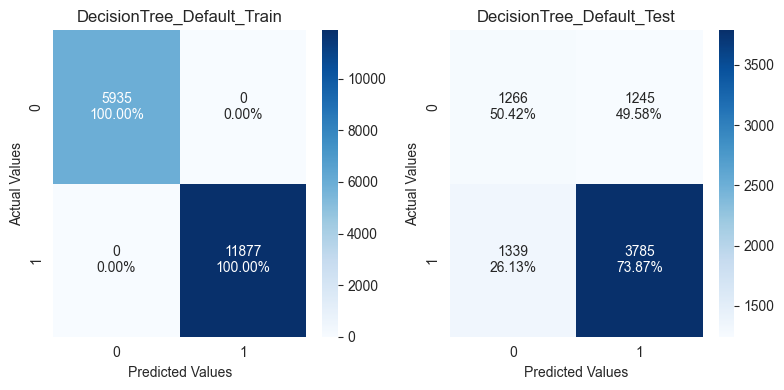

In [432]:
plot_cm_train_test(dtree, X_train, y_train, X_test, y_test, 'DecisionTree_Default_Train', 'DecisionTree_Default_Test')

* The Decision tree model with default parameters is overfitting the train data.

# Model Building - Bagging

## Bagging classifier

In [433]:
# Model Building
bagging=BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [660]:
df_perf=classification_performance(bagging, X_train, y_train, 'Bagging_Default_Train',df_perf)
df_perf=classification_performance(bagging, X_test, y_test, 'Bagging_Default_Test',df_perf)
df_perf

,Model,Accuracy,Recall,Precision,F1
0,DecisionTree_Default_Train,1.00,1.00,1.00,1.00
1,DecisionTree_Default_Test,0.66,0.74,0.75,0.75
2,Bagging_Default_Train,0.99,0.99,0.99,0.99
3,Bagging_Default_Test,0.70,0.78,0.77,0.78


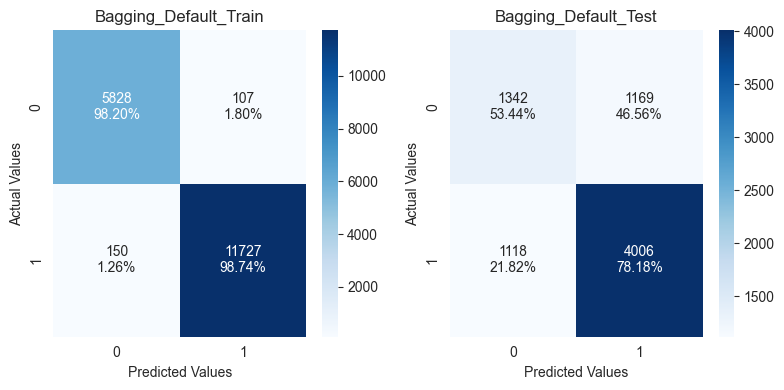

In [435]:
plot_cm_train_test(bagging, X_train, y_train, X_test, y_test, 'Bagging_Default_Train', 'Bagging_Default_Test')

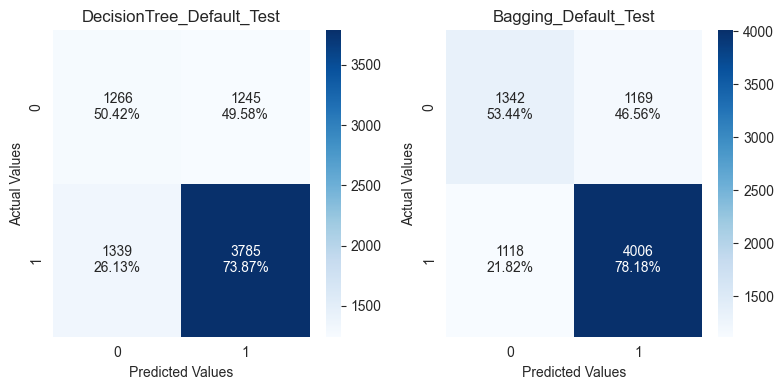

In [436]:
plot_cm_model1_model2(dtree, bagging, X_test, X_test, y_test, 'DecisionTree_Default_Test', 'Bagging_Default_Test')

* The Bagging model with default parameters is overfitting the train data.
* The Bagging model with default parameters is slightly better performance than Decision tree model with default parameter


## Random Forest

In [437]:
# Model Building
RForest=RandomForestClassifier(random_state=1)
RForest.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [661]:
df_perf=classification_performance(RForest, X_train, y_train, 'RandomForest_Default_Train',df_perf)
df_perf=classification_performance(RForest, X_test, y_test, 'RandomForest_Default_Test',df_perf)

In [662]:
df_perf[(df_perf['Model'].str.contains("Train"))]

,Model,Accuracy,Recall,Precision,F1
0,DecisionTree_Default_Train,1.00,1.00,1.00,1.00
2,Bagging_Default_Train,0.99,0.99,0.99,0.99
4,RandomForest_Default_Train,1.00,1.00,1.00,1.00


In [663]:
df_perf[(df_perf['Model'].str.contains("Test"))]

,Model,Accuracy,Recall,Precision,F1
1,DecisionTree_Default_Test,0.66,0.74,0.75,0.75
3,Bagging_Default_Test,0.70,0.78,0.77,0.78
5,RandomForest_Default_Test,0.73,0.84,0.77,0.81


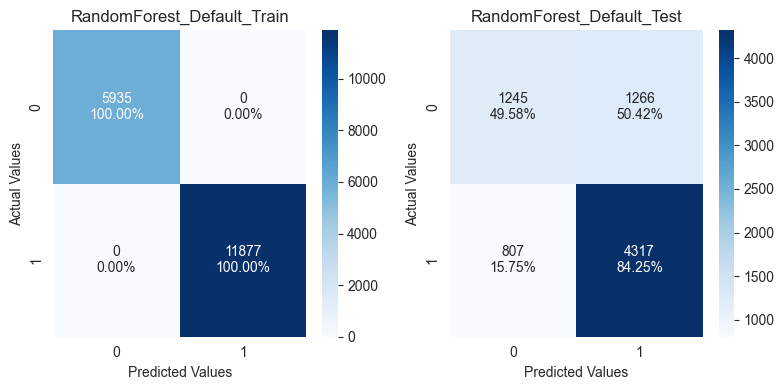

In [441]:
plot_cm_train_test(RForest, X_train, y_train, X_test, y_test, 'RandomForest_Default_Train', 'RandomForest_Default_Test')

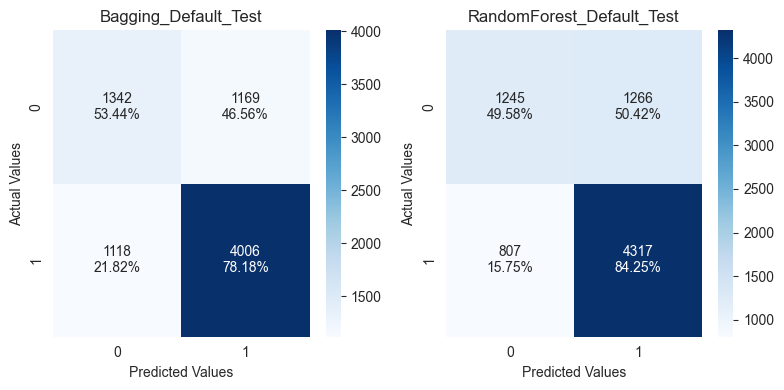

In [442]:
plot_cm_model1_model2(bagging, RForest, X_test, X_test, y_test, 'Bagging_Default_Test','RandomForest_Default_Test')

* The Random Forest model is overfitting the train data.
* The Random Forest model has the better performance than the Bagging model on test data.
* From the models evaluated so far, the best performer model is **Bagging**

# Model Building - Boosting

## Gradient Boosting

In [443]:
# Model Building
GradientB = GradientBoostingClassifier(random_state=1)
GradientB.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [664]:
df_perf=classification_performance(GradientB, X_train, y_train, 'GradientBoosting_Default_Train',df_perf)
df_perf=classification_performance(GradientB, X_test, y_test, 'GradientBoosting_Default_Test',df_perf)

In [665]:
df_perf[(df_perf['Model'].str.contains("Train"))]

,Model,Accuracy,Recall,Precision,F1
0,DecisionTree_Default_Train,1.00,1.00,1.00,1.00
2,Bagging_Default_Train,0.99,0.99,0.99,0.99
4,RandomForest_Default_Train,1.00,1.00,1.00,1.00
6,GradientBoosting_Default_Train,0.75,0.88,0.78,0.82


In [666]:
df_perf[(df_perf['Model'].str.contains("Test"))]

,Model,Accuracy,Recall,Precision,F1
1,DecisionTree_Default_Test,0.66,0.74,0.75,0.75
3,Bagging_Default_Test,0.70,0.78,0.77,0.78
5,RandomForest_Default_Test,0.73,0.84,0.77,0.81
7,GradientBoosting_Default_Test,0.75,0.89,0.78,0.83


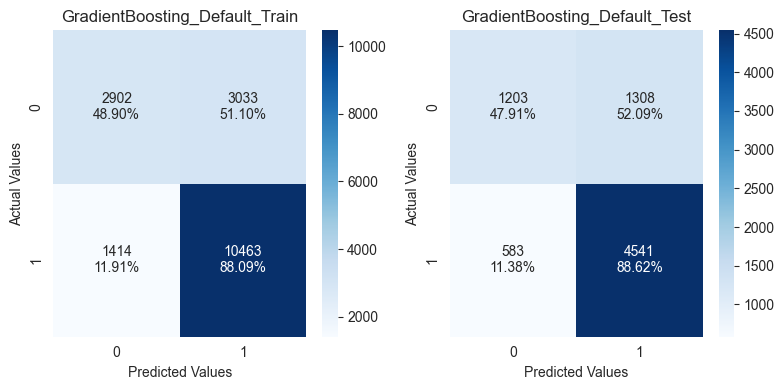

In [667]:
plot_cm_train_test(GradientB, X_train, y_train, X_test, y_test, 'GradientBoosting_Default_Train', 'GradientBoosting_Default_Test')

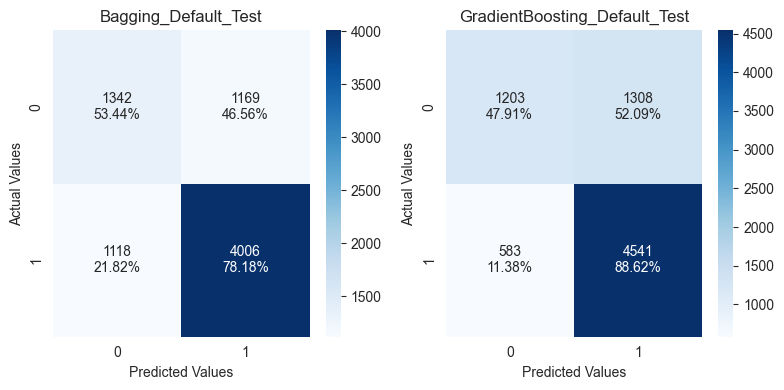

In [668]:
plot_cm_model1_model2(bagging,GradientB, X_test, X_test, y_test, 'Bagging_Default_Test','GradientBoosting_Default_Test')

* The Gradient Boost model is giving a generalized performance.
* The Gradient Boost model is giving better performance than Bagging model.
* From the models evaluated so far, the best performer model is **Gradient Boost**


## Adaboost

In [449]:
# Model Building
AdaBoost = AdaBoostClassifier(random_state=1)
AdaBoost.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [669]:
df_perf=classification_performance(AdaBoost, X_train, y_train, 'AdaBoost_Default_Train',df_perf)
df_perf=classification_performance(AdaBoost, X_test, y_test, 'AdaBoost_Default_Test',df_perf)

In [670]:
df_perf[(df_perf['Model'].str.contains("Train"))]

,Model,Accuracy,Recall,Precision,F1
0,DecisionTree_Default_Train,1.00,1.00,1.00,1.00
2,Bagging_Default_Train,0.99,0.99,0.99,0.99
4,RandomForest_Default_Train,1.00,1.00,1.00,1.00
6,GradientBoosting_Default_Train,0.75,0.88,0.78,0.82
8,AdaBoost_Default_Train,0.74,0.89,0.76,0.82


In [671]:
df_perf[(df_perf['Model'].str.contains("Test"))]

,Model,Accuracy,Recall,Precision,F1
1,DecisionTree_Default_Test,0.66,0.74,0.75,0.75
3,Bagging_Default_Test,0.70,0.78,0.77,0.78
5,RandomForest_Default_Test,0.73,0.84,0.77,0.81
7,GradientBoosting_Default_Test,0.75,0.89,0.78,0.83
9,AdaBoost_Default_Test,0.74,0.90,0.76,0.82


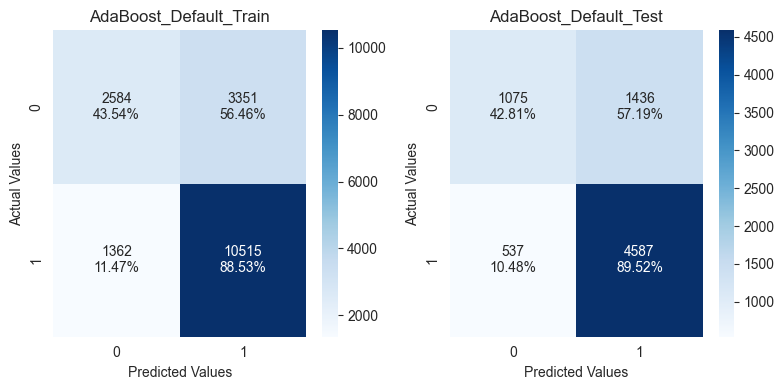

In [453]:
plot_cm_train_test(AdaBoost, X_train, y_train, X_test, y_test, 'AdaBoost_Default_Train', 'AdaBoost_Default_Test')

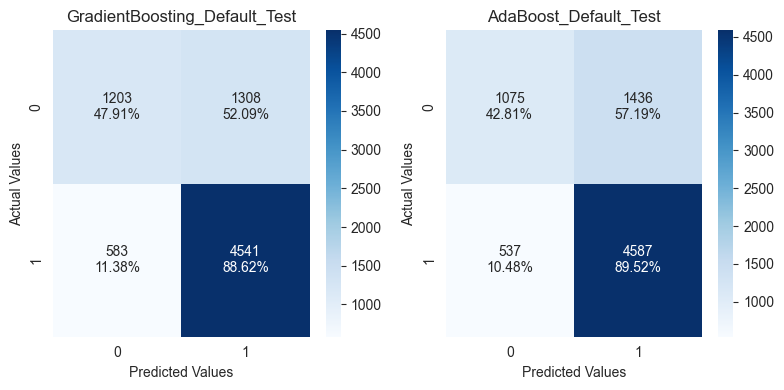

In [454]:
plot_cm_model1_model2(GradientB, AdaBoost,X_test, X_test, y_test, 'GradientBoosting_Default_Test','AdaBoost_Default_Test')

* The AdaBoost model is giving a generalized performance.
* The AdaBoost model is giving slightly worst performance than Gradient Boost.
* From the models evaluated so far, the best performer model is **Gradient Boost**


## XGBoost

In [455]:
# Model Building
XGBoost = XGBClassifier(random_state=1, eval_metric='logloss')
XGBoost.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [672]:
df_perf=classification_performance(XGBoost, X_train, y_train, 'XGBoost_Default_Train',df_perf)
df_perf=classification_performance(XGBoost, X_test, y_test, 'XGBoost_Default_Test',df_perf)

In [673]:
df_perf[(df_perf['Model'].str.contains("Train"))]

,Model,Accuracy,Recall,Precision,F1
0,DecisionTree_Default_Train,1.00,1.00,1.00,1.00
2,Bagging_Default_Train,0.99,0.99,0.99,0.99
4,RandomForest_Default_Train,1.00,1.00,1.00,1.00
6,GradientBoosting_Default_Train,0.75,0.88,0.78,0.82
8,AdaBoost_Default_Train,0.74,0.89,0.76,0.82
10,XGBoost_Default_Train,0.84,0.93,0.85,0.89


In [674]:
df_perf[(df_perf['Model'].str.contains("Test"))]

,Model,Accuracy,Recall,Precision,F1
1,DecisionTree_Default_Test,0.66,0.74,0.75,0.75
3,Bagging_Default_Test,0.70,0.78,0.77,0.78
5,RandomForest_Default_Test,0.73,0.84,0.77,0.81
7,GradientBoosting_Default_Test,0.75,0.89,0.78,0.83
9,AdaBoost_Default_Test,0.74,0.90,0.76,0.82
11,XGBoost_Default_Test,0.74,0.86,0.77,0.82


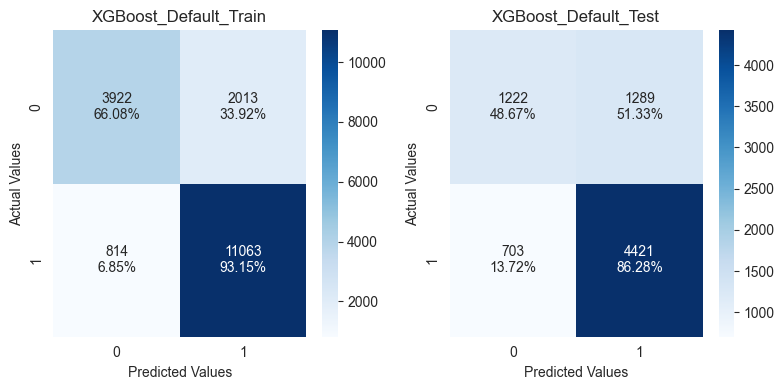

In [459]:
plot_cm_train_test(XGBoost, X_train, y_train, X_test, y_test, 'XGBoost_Default_Train', 'XGBoost_Default_Test')

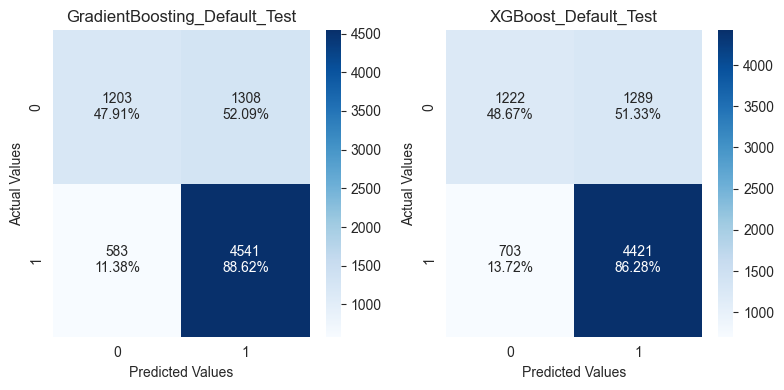

In [654]:
plot_cm_model1_model2(GradientB,XGBoost,X_test, X_test, y_test, 'GradientBoosting_Default_Test', 'XGBoost_Default_Test')

* The XGBoost model is giving a generalized performance.
* The XGBoost model is giving slightly worst performance than Gradient Boost.
* From the models evaluated so far, the best performer model is **Gradient Boost**


## Feature Importances

In [519]:
# Initialize models
models = {
    "DecisionTree":dtree,
    "Bagging":bagging,
    "RandomForest":RForest,
    "GradientBoosting":GradientB,
    "AdaBoost":AdaBoost,
    "XGBoost":XGBoost
}

# Collect feature importances
feature_importances = {}

for model_name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        feature_importances[model_name] = model.feature_importances_
        
    elif hasattr(model, 'estimators_'):  # For Bagging
        # Aggregate importances from base estimators
        importances = np.array([tree.feature_importances_ for tree in model.estimators_])
        feature_importances[model_name] = np.mean(importances, axis=0)

# Convert to DataFrame
df_feature_importances = pd.DataFrame(feature_importances, index=X_train.columns)
df_feature_importances['mean_importance'] = df_feature_importances.mean(axis=1)

# Print the DataFrame
df_feature_importances.sort_values('mean_importance',ascending=False)


,DecisionTree,Bagging,RandomForest,GradientBoosting,AdaBoost,XGBoost,mean_importance
prevailing_wage,0.25,0.25,0.24,0.03,0.36,0.01,0.19
no_of_employees,0.25,0.24,0.24,0.02,0.22,0.01,0.16
education_of_employee_High School,0.08,0.08,0.06,0.31,0.04,0.23,0.13
yr_of_estab,0.18,0.18,0.20,0.01,0.10,0.01,0.11
has_job_experience_Y,0.05,0.04,0.04,0.18,0.02,0.09,0.07
education_of_employee_Master's,0.02,0.02,0.03,0.11,0.04,0.05,0.05
education_of_employee_Doctorate,0.02,0.02,0.02,0.06,0.02,0.10,0.04
unit_of_wage_Day,0.01,0.01,0.01,0.07,0.02,0.07,0.03
continent_Europe,0.02,0.02,0.01,0.06,0.02,0.07,0.03
region_of_employment_Midwest,0.01,0.01,0.01,0.03,0.02,0.04,0.02


In [566]:
df_feature_importances.sort_values('GradientBoosting',ascending=False).index[:10].tolist()

['education_of_employee_High School',
 'has_job_experience_Y',
 "education_of_employee_Master's",
 'unit_of_wage_Day',
 'continent_Europe',
 'education_of_employee_Doctorate',
 'region_of_employment_Midwest',
 'prevailing_wage',
 'no_of_employees',
 'unit_of_wage_Year']

In [526]:
df_feature_importances.sort_values('mean_importance',ascending=False).index[:5].tolist()

['prevailing_wage',
 'no_of_employees',
 'education_of_employee_High School',
 'yr_of_estab',
 'has_job_experience_Y']

* The top 5 feature importance for Gradient Boost model is 'education_of_employee_High School', 'has_job_experience_Y', "education_of_employee_Master's", 'unit_of_wage_Day', 'continent_Europe'
* The top 5 feature importance for the mean of all models is 'prevailing_wage', 'no_of_employees', 'education_of_employee_High School', 'yr_of_estab', 'has_job_experience_Ye.

# Consolidated notes on Model Building with default parameters
* The Decision tree model is overfitting the train data.
* The Bagging model is overfitting the train data.
* The Bagging model is slightly better performance in test data than Decision tree model
* The Random Forest model is overfitting the train data.
* The Random Forest model has the better performance than the Bagging model on test data.
* From the models evaluated so far, the best performer model is **Bagging**
* The Gradient Boost model is giving a generalized performance.
* The Gradient Boost model is giving better performance than Bagging model.
* From the models evaluated so far, the best performer model is **Gradient Boost**
* The AdaBoost model is giving a generalized performance.
* The AdaBoost model is giving slightly worst performance than Gradient Boost.
* From the models evaluated so far, the best performer model is **Gradient Boost**
* The XGBoost model is giving a generalized performance.
* The XGBoost model is giving slightly worst performance than Gradient Boost.
* From the models evaluated so far, the best performer model is **Gradient Boost**
* **The top 5 feature importance for Gradient Boost model are 'education_of_employee_High School', 'has_job_experience_Y', "education_of_employee_Master's", 'unit_of_wage_Day', 'continent_Europe'**
* The top 5 feature importance for the mean of all models are 'prevailing_wage', 'no_of_employees', 'education_of_employee_High School', 'yr_of_estab', 'has_job_experience_Y'


# Model Building with Hyperparameter Tuning

## Decision Tree tuned

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

In [463]:
# Grid of parameters to choose from
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree, param_grid, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, random_state=1)

In [675]:
df_perf=classification_performance(dtree_tuned, X_train, y_train, 'DecisionTree_Tuned_Train',df_perf)
df_perf=classification_performance(dtree_tuned, X_test, y_test, 'DecisionTree_Tuned_Test',df_perf)

In [676]:
df_perf[(df_perf['Model'].str.contains("Train"))]

,Model,Accuracy,Recall,Precision,F1
0,DecisionTree_Default_Train,1.00,1.00,1.00,1.00
2,Bagging_Default_Train,0.99,0.99,0.99,0.99
4,RandomForest_Default_Train,1.00,1.00,1.00,1.00
6,GradientBoosting_Default_Train,0.75,0.88,0.78,0.82
8,AdaBoost_Default_Train,0.74,0.89,0.76,0.82
10,XGBoost_Default_Train,0.84,0.93,0.85,0.89
12,DecisionTree_Tuned_Train,0.73,0.91,0.74,0.82


In [677]:
df_perf[(df_perf['Model'].str.contains("Test"))]

,Model,Accuracy,Recall,Precision,F1
1,DecisionTree_Default_Test,0.66,0.74,0.75,0.75
3,Bagging_Default_Test,0.70,0.78,0.77,0.78
5,RandomForest_Default_Test,0.73,0.84,0.77,0.81
7,GradientBoosting_Default_Test,0.75,0.89,0.78,0.83
9,AdaBoost_Default_Test,0.74,0.90,0.76,0.82
11,XGBoost_Default_Test,0.74,0.86,0.77,0.82
13,DecisionTree_Tuned_Test,0.73,0.91,0.75,0.82


In [678]:
df_perf[(df_perf['Model'].str.contains("Test"))].sort_values('F1',ascending=False)

,Model,Accuracy,Recall,Precision,F1
7,GradientBoosting_Default_Test,0.75,0.89,0.78,0.83
9,AdaBoost_Default_Test,0.74,0.90,0.76,0.82
13,DecisionTree_Tuned_Test,0.73,0.91,0.75,0.82
11,XGBoost_Default_Test,0.74,0.86,0.77,0.82
5,RandomForest_Default_Test,0.73,0.84,0.77,0.81
3,Bagging_Default_Test,0.70,0.78,0.77,0.78
1,DecisionTree_Default_Test,0.66,0.74,0.75,0.75


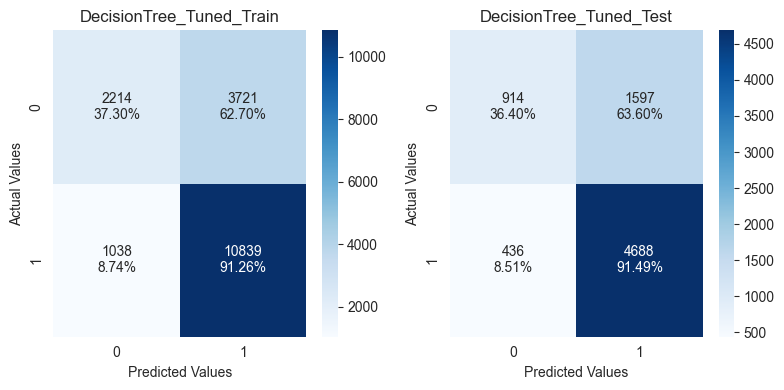

In [467]:
plot_cm_train_test(dtree_tuned, X_train, y_train, X_test, y_test, 'DecisionTree_Tuned_Train', 'DecisionTree_Tuned_Test')

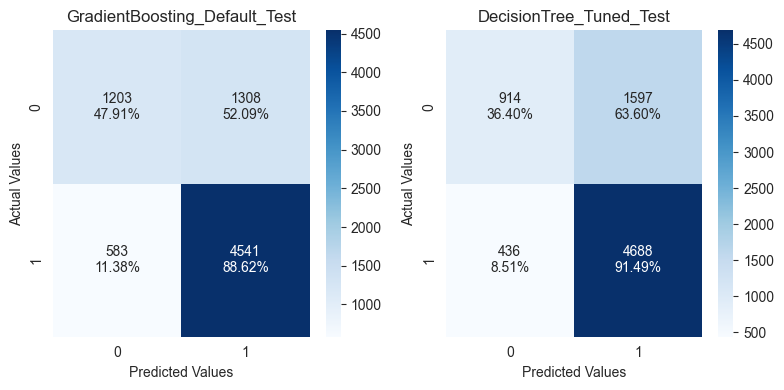

In [528]:
plot_cm_model1_model2(GradientB, dtree_tuned, X_test, X_test, y_test, 'GradientBoosting_Default_Test', 'DecisionTree_Tuned_Test')

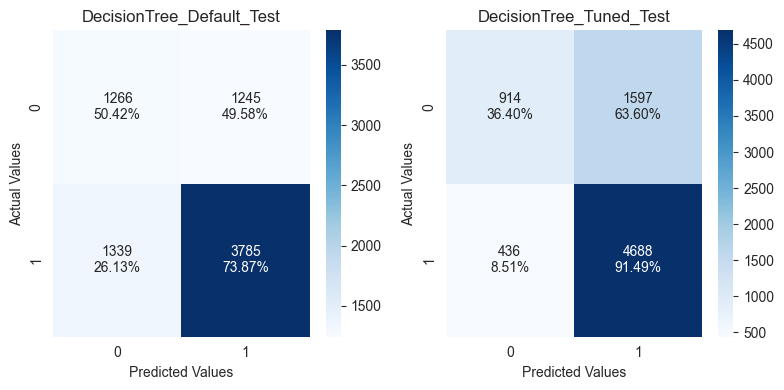

In [468]:
plot_cm_model1_model2(dtree, dtree_tuned, X_test, X_test, y_test, 'DecisionTree_Default_Test', 'DecisionTree_Tuned_Test')

* The Decision tree model has no overfitting and has a generalized performance
* The Decision tree model is giving **slightly worst** performance than Gradient Boost default-model.
* The Decision tree tuned-model performance is **better** than the performance of Decision tree default-model
* From the models evaluated so far, the best performer model is **Gradient Boost default-model**


## Bagging classifier tuned

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
- Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```

In [469]:
# Grid of parameters to choose from
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging, param_grid, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=70,
                  random_state=1)

In [679]:
df_perf=classification_performance(bagging_tuned, X_train, y_train, 'Bagging_Tuned_Train',df_perf)
df_perf=classification_performance(bagging_tuned, X_test, y_test, 'Bagging_Tuned_Test',df_perf)

In [680]:
df_perf[(df_perf['Model'].str.contains("Train"))]

,Model,Accuracy,Recall,Precision,F1
0,DecisionTree_Default_Train,1.00,1.00,1.00,1.00
2,Bagging_Default_Train,0.99,0.99,0.99,0.99
4,RandomForest_Default_Train,1.00,1.00,1.00,1.00
6,GradientBoosting_Default_Train,0.75,0.88,0.78,0.82
8,AdaBoost_Default_Train,0.74,0.89,0.76,0.82
10,XGBoost_Default_Train,0.84,0.93,0.85,0.89
12,DecisionTree_Tuned_Train,0.73,0.91,0.74,0.82
14,Bagging_Tuned_Train,1.00,1.00,1.00,1.00


In [681]:
df_perf[(df_perf['Model'].str.contains("Test"))]

,Model,Accuracy,Recall,Precision,F1
1,DecisionTree_Default_Test,0.66,0.74,0.75,0.75
3,Bagging_Default_Test,0.70,0.78,0.77,0.78
5,RandomForest_Default_Test,0.73,0.84,0.77,0.81
7,GradientBoosting_Default_Test,0.75,0.89,0.78,0.83
9,AdaBoost_Default_Test,0.74,0.90,0.76,0.82
11,XGBoost_Default_Test,0.74,0.86,0.77,0.82
13,DecisionTree_Tuned_Test,0.73,0.91,0.75,0.82
15,Bagging_Tuned_Test,0.73,0.89,0.75,0.82


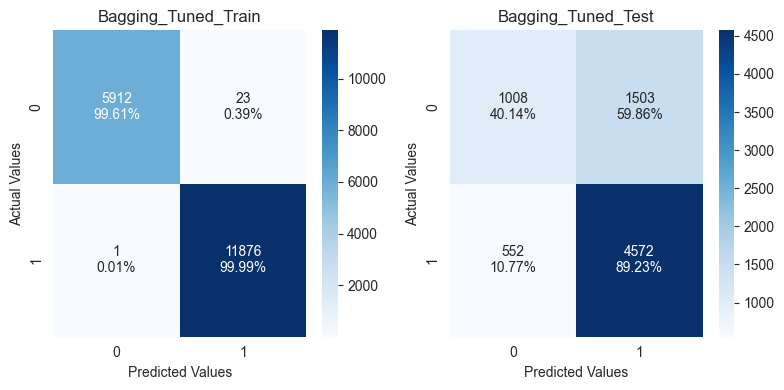

In [683]:
plot_cm_train_test(bagging_tuned, X_train, y_train, X_test, y_test, 'Bagging_Tuned_Train', 'Bagging_Tuned_Test')

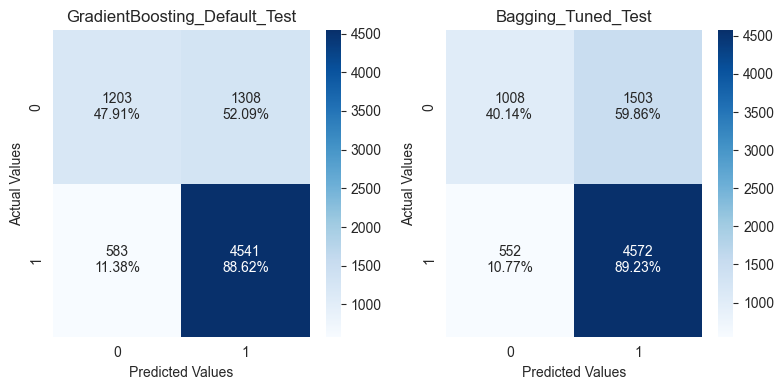

In [684]:

plot_cm_model1_model2(GradientB, bagging_tuned, X_test, X_test, y_test, 'GradientBoosting_Default_Test','Bagging_Tuned_Test')

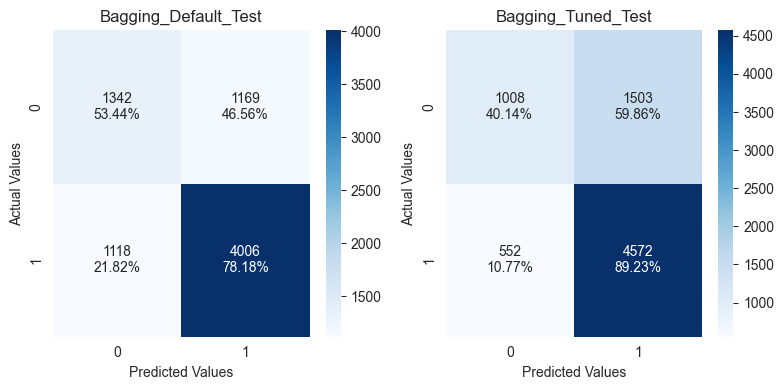

In [656]:
plot_cm_model1_model2(bagging, bagging_tuned, X_test, X_test, y_test, 'Bagging_Default_Test', 'Bagging_Tuned_Test')

* The Bagging model is still overfitting the train data.
* The Bagging model model is giving **worst** performance than Gradient Boost default-model.
* The Bagging tuned-model performance is **better** than the performance of Bagging default-model
* From the models evaluated so far, the best performer model is **Gradient Boost default-model**


## Random Forest tuned

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
- Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase
- For Random Forest:
```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

In [475]:
# Grid of parameters to choose from
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(RForest, param_grid, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
RForest_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
RForest_tuned.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.4, min_samples_leaf=3, n_estimators=110,
                       random_state=1)

In [686]:
df_perf=classification_performance(RForest_tuned, X_train, y_train, 'RandomForest_Tuned_Train',df_perf)
df_perf=classification_performance(RForest_tuned, X_test, y_test, 'RandomForest_Tuned_Test',df_perf)

In [687]:
df_perf[(df_perf['Model'].str.contains("Train"))]

,Model,Accuracy,Recall,Precision,F1
0,DecisionTree_Default_Train,1.00,1.00,1.00,1.00
2,Bagging_Default_Train,0.99,0.99,0.99,0.99
4,RandomForest_Default_Train,1.00,1.00,1.00,1.00
6,GradientBoosting_Default_Train,0.75,0.88,0.78,0.82
8,AdaBoost_Default_Train,0.74,0.89,0.76,0.82
10,XGBoost_Default_Train,0.84,0.93,0.85,0.89
12,DecisionTree_Tuned_Train,0.73,0.91,0.74,0.82
14,Bagging_Tuned_Train,1.00,1.00,1.00,1.00
16,RandomForest_Tuned_Train,0.79,0.91,0.80,0.86


In [688]:
df_perf[(df_perf['Model'].str.contains("Test"))]

,Model,Accuracy,Recall,Precision,F1
1,DecisionTree_Default_Test,0.66,0.74,0.75,0.75
3,Bagging_Default_Test,0.70,0.78,0.77,0.78
5,RandomForest_Default_Test,0.73,0.84,0.77,0.81
7,GradientBoosting_Default_Test,0.75,0.89,0.78,0.83
9,AdaBoost_Default_Test,0.74,0.90,0.76,0.82
11,XGBoost_Default_Test,0.74,0.86,0.77,0.82
13,DecisionTree_Tuned_Test,0.73,0.91,0.75,0.82
15,Bagging_Tuned_Test,0.73,0.89,0.75,0.82
17,RandomForest_Tuned_Test,0.75,0.89,0.78,0.83


In [689]:
df_perf[(df_perf['Model'].str.contains("Test"))].sort_values('F1',ascending=False)

,Model,Accuracy,Recall,Precision,F1
17,RandomForest_Tuned_Test,0.75,0.89,0.78,0.83
7,GradientBoosting_Default_Test,0.75,0.89,0.78,0.83
9,AdaBoost_Default_Test,0.74,0.90,0.76,0.82
13,DecisionTree_Tuned_Test,0.73,0.91,0.75,0.82
15,Bagging_Tuned_Test,0.73,0.89,0.75,0.82
11,XGBoost_Default_Test,0.74,0.86,0.77,0.82
5,RandomForest_Default_Test,0.73,0.84,0.77,0.81
3,Bagging_Default_Test,0.70,0.78,0.77,0.78
1,DecisionTree_Default_Test,0.66,0.74,0.75,0.75


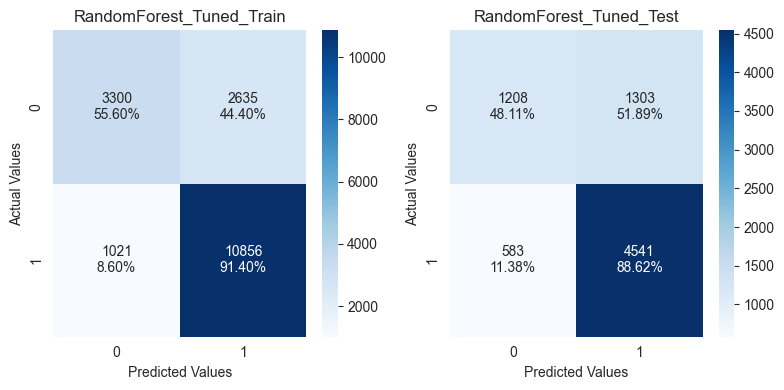

In [485]:
plot_cm_train_test(RForest_tuned, X_train, y_train, X_test, y_test, 'RandomForest_Tuned_Train', 'RandomForest_Tuned_Test')

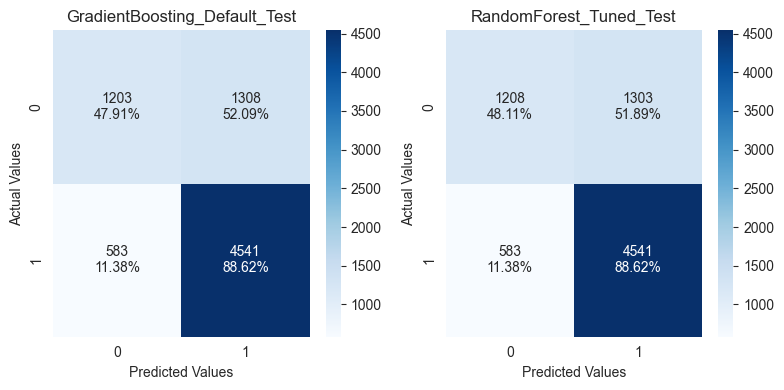

In [530]:

plot_cm_model1_model2(dtree_tuned, RForest_tuned, X_test, X_test, y_test, 'GradientBoosting_Default_Test', 'RandomForest_Tuned_Test')

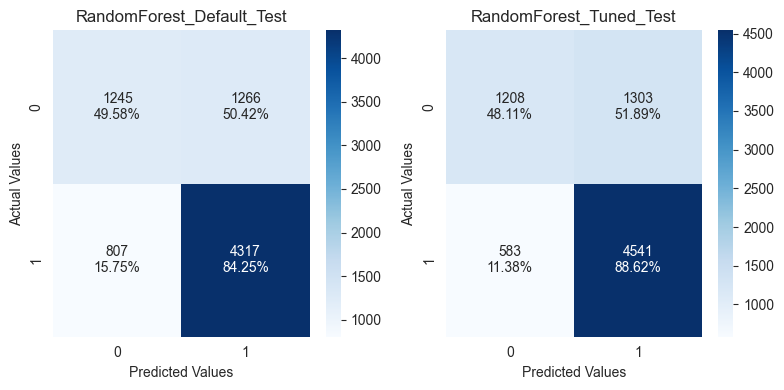

In [486]:
plot_cm_model1_model2(RForest,RForest_tuned, X_test, X_test, y_test, 'RandomForest_Default_Test','RandomForest_Tuned_Test')

* The Random Forest model has no overfitting and has a generalized performance
* The Random Forest model performance is **slightly better** the performance of Gradient Boost default-model.
* The Random Forest tuned-model performance is **better** than the performance of Random Forest default-model.
* From the models evaluated so far, the best performer model is **Random Forest tuned-model**


## Gradient Boosting tuned

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
- Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase
- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

In [487]:
# Grid of parameters to choose from
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(GradientB, param_grid, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
GradientB_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
GradientB_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.5, random_state=1,
                           subsample=0.7)

In [691]:
df_perf=classification_performance(GradientB_tuned, X_train, y_train, 'GradientBoosting_Tuned_Train',df_perf)
df_perf=classification_performance(GradientB_tuned, X_test, y_test, 'GradientBoosting_Tuned_Test',df_perf)

In [692]:
df_perf[(df_perf['Model'].str.contains("Train"))]

,Model,Accuracy,Recall,Precision,F1
0,DecisionTree_Default_Train,1.00,1.00,1.00,1.00
2,Bagging_Default_Train,0.99,0.99,0.99,0.99
4,RandomForest_Default_Train,1.00,1.00,1.00,1.00
6,GradientBoosting_Default_Train,0.75,0.88,0.78,0.82
8,AdaBoost_Default_Train,0.74,0.89,0.76,0.82
10,XGBoost_Default_Train,0.84,0.93,0.85,0.89
12,DecisionTree_Tuned_Train,0.73,0.91,0.74,0.82
14,Bagging_Tuned_Train,1.00,1.00,1.00,1.00
16,RandomForest_Tuned_Train,0.79,0.91,0.80,0.86
18,GradientBoosting_Tuned_Train,0.74,0.89,0.76,0.82


In [693]:
df_perf[(df_perf['Model'].str.contains("Test"))]

,Model,Accuracy,Recall,Precision,F1
1,DecisionTree_Default_Test,0.66,0.74,0.75,0.75
3,Bagging_Default_Test,0.70,0.78,0.77,0.78
5,RandomForest_Default_Test,0.73,0.84,0.77,0.81
7,GradientBoosting_Default_Test,0.75,0.89,0.78,0.83
9,AdaBoost_Default_Test,0.74,0.90,0.76,0.82
11,XGBoost_Default_Test,0.74,0.86,0.77,0.82
13,DecisionTree_Tuned_Test,0.73,0.91,0.75,0.82
15,Bagging_Tuned_Test,0.73,0.89,0.75,0.82
17,RandomForest_Tuned_Test,0.75,0.89,0.78,0.83
19,GradientBoosting_Tuned_Test,0.75,0.90,0.77,0.83


In [694]:
df_perf[(df_perf['Model'].str.contains("Test"))].sort_values('F1',ascending=False)

,Model,Accuracy,Recall,Precision,F1
19,GradientBoosting_Tuned_Test,0.75,0.90,0.77,0.83
17,RandomForest_Tuned_Test,0.75,0.89,0.78,0.83
7,GradientBoosting_Default_Test,0.75,0.89,0.78,0.83
9,AdaBoost_Default_Test,0.74,0.90,0.76,0.82
13,DecisionTree_Tuned_Test,0.73,0.91,0.75,0.82
15,Bagging_Tuned_Test,0.73,0.89,0.75,0.82
11,XGBoost_Default_Test,0.74,0.86,0.77,0.82
5,RandomForest_Default_Test,0.73,0.84,0.77,0.81
3,Bagging_Default_Test,0.70,0.78,0.77,0.78
1,DecisionTree_Default_Test,0.66,0.74,0.75,0.75


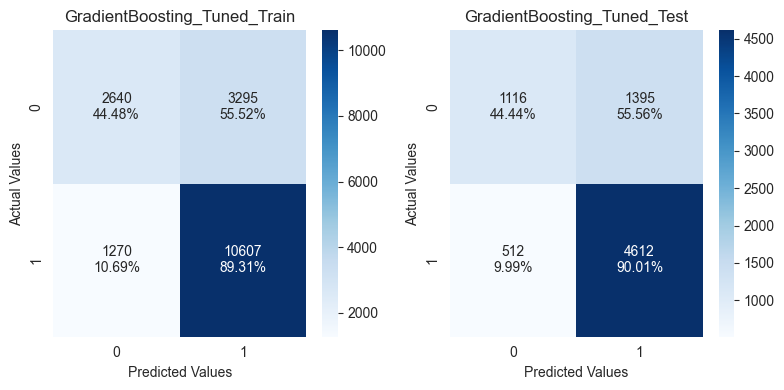

In [497]:
plot_cm_train_test(GradientB_tuned, X_train, y_train, X_test, y_test, 'GradientBoosting_Tuned_Train', 'GradientBoosting_Tuned_Test')

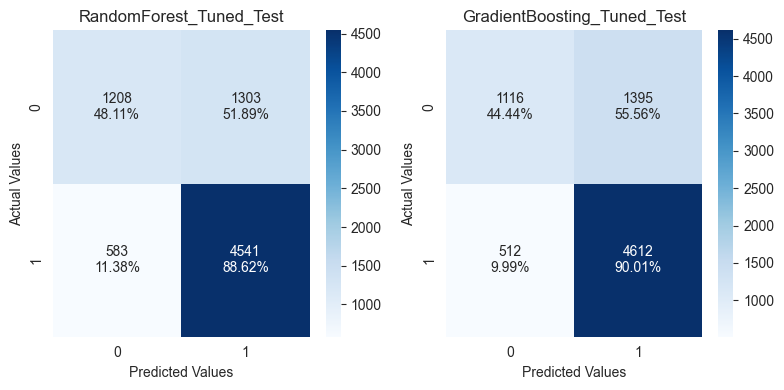

In [574]:
plot_cm_model1_model2(RForest_tuned, GradientB_tuned, X_test, X_test, y_test, 'RandomForest_Tuned_Test','GradientBoosting_Tuned_Test')

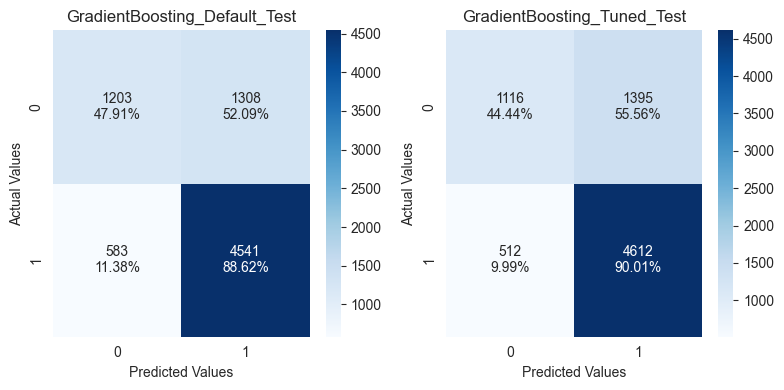

In [498]:

plot_cm_model1_model2(GradientB, GradientB_tuned,X_test, X_test, y_test, 'GradientBoosting_Default_Test','GradientBoosting_Tuned_Test')

* The Gradient Boost model has no overfitting and has a generalized performance.
* The Gradient Boost model performance is **slightly better** than the performance of Random Forest model.
* The Gradient Boost tuned-model performance is **slightly better** than the performance of Gradient Boost default-model.
* From the models evaluated so far, the best performer model is **Gradient Boost tuned-model**


## AdaBoost tuned

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
- Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase
- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

In [499]:
# Grid of parameters to choose from
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(AdaBoost, param_grid, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
AdaBoost_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
AdaBoost_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=100, random_state=1)

In [696]:
df_perf=classification_performance(AdaBoost_tuned, X_train, y_train, 'AdaBoost_Tuned_Train',df_perf)
df_perf=classification_performance(AdaBoost_tuned, X_test, y_test, 'AdaBoost_Tuned_Test',df_perf)

In [697]:
df_perf[(df_perf['Model'].str.contains("Train"))]

,Model,Accuracy,Recall,Precision,F1
0,DecisionTree_Default_Train,1.00,1.00,1.00,1.00
2,Bagging_Default_Train,0.99,0.99,0.99,0.99
4,RandomForest_Default_Train,1.00,1.00,1.00,1.00
6,GradientBoosting_Default_Train,0.75,0.88,0.78,0.82
8,AdaBoost_Default_Train,0.74,0.89,0.76,0.82
10,XGBoost_Default_Train,0.84,0.93,0.85,0.89
12,DecisionTree_Tuned_Train,0.73,0.91,0.74,0.82
14,Bagging_Tuned_Train,1.00,1.00,1.00,1.00
16,RandomForest_Tuned_Train,0.79,0.91,0.80,0.86
18,GradientBoosting_Tuned_Train,0.74,0.89,0.76,0.82


In [698]:
df_perf[(df_perf['Model'].str.contains("Test"))]

,Model,Accuracy,Recall,Precision,F1
1,DecisionTree_Default_Test,0.66,0.74,0.75,0.75
3,Bagging_Default_Test,0.70,0.78,0.77,0.78
5,RandomForest_Default_Test,0.73,0.84,0.77,0.81
7,GradientBoosting_Default_Test,0.75,0.89,0.78,0.83
9,AdaBoost_Default_Test,0.74,0.90,0.76,0.82
11,XGBoost_Default_Test,0.74,0.86,0.77,0.82
13,DecisionTree_Tuned_Test,0.73,0.91,0.75,0.82
15,Bagging_Tuned_Test,0.73,0.89,0.75,0.82
17,RandomForest_Tuned_Test,0.75,0.89,0.78,0.83
19,GradientBoosting_Tuned_Test,0.75,0.90,0.77,0.83


In [699]:
df_perf[(df_perf['Model'].str.contains("Test"))].sort_values('F1',ascending=False)

,Model,Accuracy,Recall,Precision,F1
19,GradientBoosting_Tuned_Test,0.75,0.90,0.77,0.83
17,RandomForest_Tuned_Test,0.75,0.89,0.78,0.83
7,GradientBoosting_Default_Test,0.75,0.89,0.78,0.83
21,AdaBoost_Tuned_Test,0.75,0.90,0.76,0.83
9,AdaBoost_Default_Test,0.74,0.90,0.76,0.82
13,DecisionTree_Tuned_Test,0.73,0.91,0.75,0.82
15,Bagging_Tuned_Test,0.73,0.89,0.75,0.82
11,XGBoost_Default_Test,0.74,0.86,0.77,0.82
5,RandomForest_Default_Test,0.73,0.84,0.77,0.81
3,Bagging_Default_Test,0.70,0.78,0.77,0.78


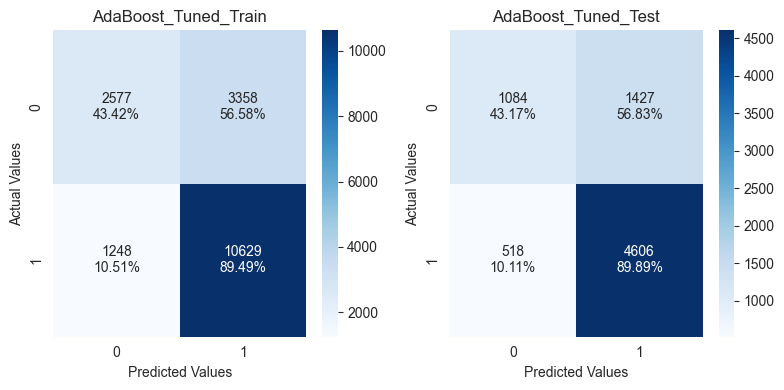

In [503]:
plot_cm_train_test(AdaBoost_tuned, X_train, y_train, X_test, y_test, 'AdaBoost_Tuned_Train', 'AdaBoost_Tuned_Test')

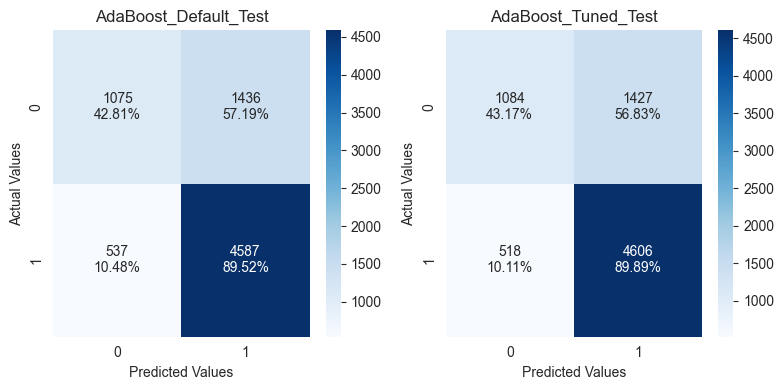

In [576]:
plot_cm_model1_model2(AdaBoost,AdaBoost_tuned,X_test, X_test, y_test, 'AdaBoost_Default_Test', 'AdaBoost_Tuned_Test')

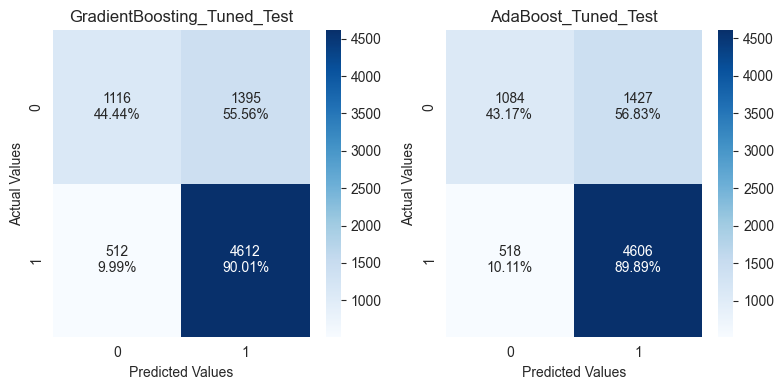

In [578]:
plot_cm_model1_model2(GradientB_tuned,AdaBoost_tuned,X_test, X_test, y_test, 'GradientBoosting_Tuned_Test', 'AdaBoost_Tuned_Test')

* The AdaBoost model has no overfitting and has a generalized performance.
* The AdaBoost model performance is **slightly worst** than the performance of Gradient Boost model.
* The AdaBoost tuned-model performance is **slightly better** than the performance of AdaBoost default-model.
* From the models evaluated so far, the best performer model is **Gradient Boost tuned-model**


## XGBoost tuned

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
- Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase
- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

In [505]:
# Grid of parameters to choose from
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(XGBoost, param_grid, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
XGBoost_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
XGBoost_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [700]:
df_perf

,Model,Accuracy,Recall,Precision,F1
0,DecisionTree_Default_Train,1.00,1.00,1.00,1.00
1,DecisionTree_Default_Test,0.66,0.74,0.75,0.75
2,Bagging_Default_Train,0.99,0.99,0.99,0.99
3,Bagging_Default_Test,0.70,0.78,0.77,0.78
4,RandomForest_Default_Train,1.00,1.00,1.00,1.00
5,RandomForest_Default_Test,0.73,0.84,0.77,0.81
6,GradientBoosting_Default_Train,0.75,0.88,0.78,0.82
7,GradientBoosting_Default_Test,0.75,0.89,0.78,0.83
8,AdaBoost_Default_Train,0.74,0.89,0.76,0.82
9,AdaBoost_Default_Test,0.74,0.90,0.76,0.82


In [701]:
df_perf=classification_performance(XGBoost_tuned, X_train, y_train, 'XGBoost_Tuned_Train',df_perf)
df_perf=classification_performance(XGBoost_tuned, X_test, y_test, 'XGBoost_Tuned_Test',df_perf)

In [702]:
df_perf[(df_perf['Model'].str.contains("Train"))]

,Model,Accuracy,Recall,Precision,F1
0,DecisionTree_Default_Train,1.00,1.00,1.00,1.00
2,Bagging_Default_Train,0.99,0.99,0.99,0.99
4,RandomForest_Default_Train,1.00,1.00,1.00,1.00
6,GradientBoosting_Default_Train,0.75,0.88,0.78,0.82
8,AdaBoost_Default_Train,0.74,0.89,0.76,0.82
10,XGBoost_Default_Train,0.84,0.93,0.85,0.89
12,DecisionTree_Tuned_Train,0.73,0.91,0.74,0.82
14,Bagging_Tuned_Train,1.00,1.00,1.00,1.00
16,RandomForest_Tuned_Train,0.79,0.91,0.80,0.86
18,GradientBoosting_Tuned_Train,0.74,0.89,0.76,0.82


In [703]:
df_perf[(df_perf['Model'].str.contains("Test"))]

,Model,Accuracy,Recall,Precision,F1
1,DecisionTree_Default_Test,0.66,0.74,0.75,0.75
3,Bagging_Default_Test,0.70,0.78,0.77,0.78
5,RandomForest_Default_Test,0.73,0.84,0.77,0.81
7,GradientBoosting_Default_Test,0.75,0.89,0.78,0.83
9,AdaBoost_Default_Test,0.74,0.90,0.76,0.82
11,XGBoost_Default_Test,0.74,0.86,0.77,0.82
13,DecisionTree_Tuned_Test,0.73,0.91,0.75,0.82
15,Bagging_Tuned_Test,0.73,0.89,0.75,0.82
17,RandomForest_Tuned_Test,0.75,0.89,0.78,0.83
19,GradientBoosting_Tuned_Test,0.75,0.90,0.77,0.83


In [704]:
df_perf[(df_perf['Model'].str.contains("Test"))].sort_values('F1',ascending=False)

,Model,Accuracy,Recall,Precision,F1
19,GradientBoosting_Tuned_Test,0.75,0.90,0.77,0.83
23,XGBoost_Tuned_Test,0.75,0.89,0.77,0.83
17,RandomForest_Tuned_Test,0.75,0.89,0.78,0.83
7,GradientBoosting_Default_Test,0.75,0.89,0.78,0.83
21,AdaBoost_Tuned_Test,0.75,0.90,0.76,0.83
9,AdaBoost_Default_Test,0.74,0.90,0.76,0.82
13,DecisionTree_Tuned_Test,0.73,0.91,0.75,0.82
15,Bagging_Tuned_Test,0.73,0.89,0.75,0.82
11,XGBoost_Default_Test,0.74,0.86,0.77,0.82
5,RandomForest_Default_Test,0.73,0.84,0.77,0.81


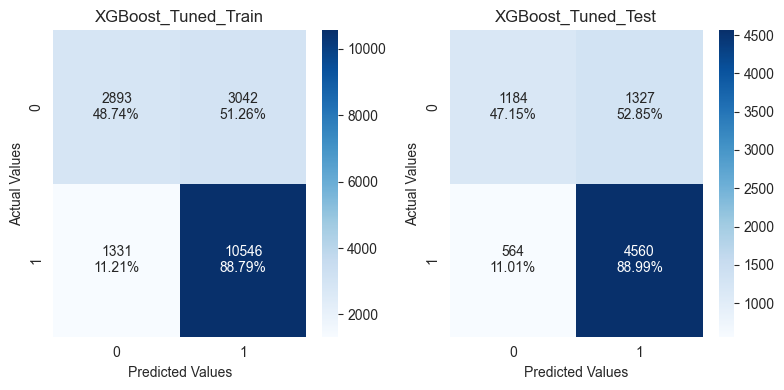

In [509]:
plot_cm_train_test(XGBoost_tuned, X_train, y_train, X_test, y_test, 'XGBoost_Tuned_Train', 'XGBoost_Tuned_Test')

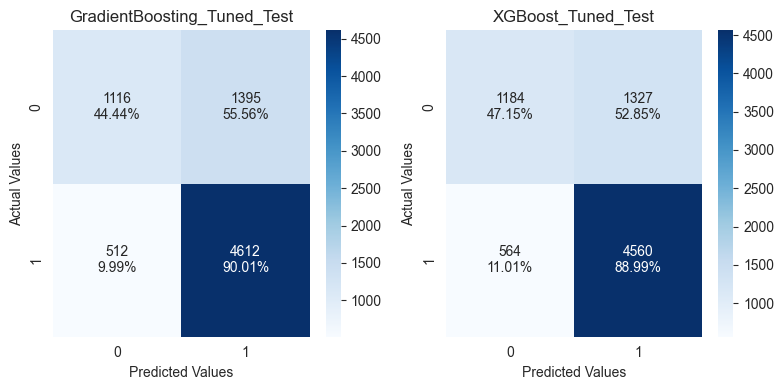

In [533]:

plot_cm_model1_model2(GradientB_tuned,XGBoost_tuned,X_test, X_test, y_test, 'GradientBoosting_Tuned_Test', 'XGBoost_Tuned_Test')

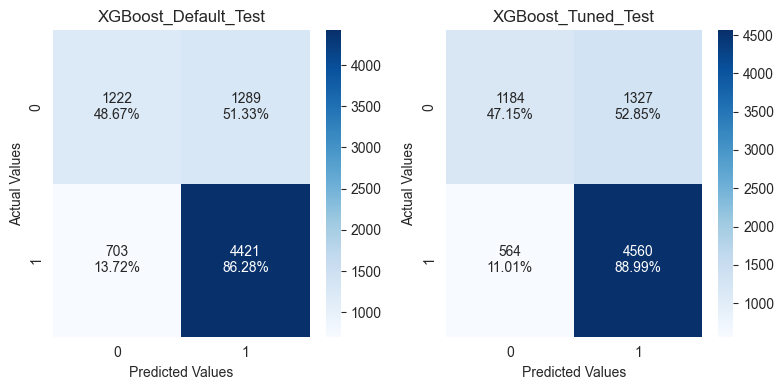

In [510]:
plot_cm_model1_model2(XGBoost, XGBoost_tuned,X_test, X_test, y_test, 'XGBoost_Default_Test','XGBoost_Tuned_Test')

* The XGBoost model has no overfitting and has a generalized performance.
* The XGBoost model performance is **slightly worst** than the performance of Gradient Boost model.
* The XGBoost tuned-model performance is **slightly better** than the performance of XGBoost default-model.
* From all models evaluated, **the best performer model is Gradient Boost tuned-model**


## Feature Importances

In [560]:
# Initialize models
models_t = {
    "DecisionTree_t": dtree_tuned,
    "Bagging_t": bagging_tuned,
    "RandomForest_t": RForest_tuned,
    "GradientBoosting_t": GradientB_tuned,
    "AdaBoost_t": AdaBoost_tuned,
    "XGBoost_t": XGBoost_tuned
}

# Collect feature importances
feature_importances_t = {}

for model_name, model in models_t.items():
    model.fit(X_train, y_train)
    
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        
    elif hasattr(model, 'estimators_'):  # For Bagging
        importances = np.mean([tree.feature_importances_ for tree in model.estimators_], axis=0)
    
    else:
        continue

    # Ensure the length of importances matches the number of features
    if len(importances) != len(X_train.columns):
        # Pad with zeros
        full_importances = np.zeros(len(X_train.columns))
        used_features = model.estimators_features_[0]  # Get features used in the first base estimator
        full_importances[used_features] = importances
        importances = full_importances
    
    feature_importances_t[model_name] = importances


# Convert to DataFrame
df_feature_importances_t = pd.DataFrame(feature_importances_t, index=X_train.columns)
df_feature_importances_t['mean_importance'] = df_feature_importances_t.mean(axis=1)

# Print the DataFrame
df_feature_importances_t.sort_values('mean_importance',ascending=False)


,DecisionTree_t,Bagging_t,RandomForest_t,GradientBoosting_t,AdaBoost_t,XGBoost_t,mean_importance
education_of_employee_High School,0.40,0.08,0.12,0.32,0.15,0.37,0.24
has_job_experience_Y,0.23,0.06,0.08,0.18,0.11,0.13,0.13
education_of_employee_Master's,0.06,0.00,0.06,0.11,0.12,0.08,0.07
education_of_employee_Doctorate,0.05,0.07,0.03,0.06,0.08,0.05,0.06
prevailing_wage,0.00,0.09,0.17,0.01,0.04,0.01,0.05
no_of_employees,0.00,0.10,0.17,0.01,0.03,0.01,0.05
continent_Europe,0.07,0.00,0.02,0.06,0.07,0.05,0.04
unit_of_wage_Day,0.04,0.07,0.03,0.08,0.03,0.03,0.04
unit_of_wage_Year,0.07,0.04,0.02,0.03,0.04,0.06,0.04
yr_of_estab,0.00,0.06,0.15,0.01,0.03,0.01,0.04


In [579]:
df_feature_importances_t.sort_values('GradientBoosting_t',ascending=False).index[:10].tolist()

['education_of_employee_High School',
 'has_job_experience_Y',
 "education_of_employee_Master's",
 'unit_of_wage_Day',
 'education_of_employee_Doctorate',
 'continent_Europe',
 'region_of_employment_Midwest',
 'unit_of_wage_Year',
 'continent_North America',
 'region_of_employment_South']

In [564]:
df_feature_importances_t.sort_values('mean_importance',ascending=False).index[:5].tolist()

['education_of_employee_High School',
 'has_job_experience_Y',
 "education_of_employee_Master's",
 'education_of_employee_Doctorate',
 'prevailing_wage']

In [569]:
df_feature_importances.sort_values('GradientBoosting',ascending=False).index[:10].tolist()

['education_of_employee_High School',
 'has_job_experience_Y',
 "education_of_employee_Master's",
 'unit_of_wage_Day',
 'continent_Europe',
 'education_of_employee_Doctorate',
 'region_of_employment_Midwest',
 'prevailing_wage',
 'no_of_employees',
 'unit_of_wage_Year']


* **The top 5 feature importance for Gradient Boost model are** 'education_of_employee_High School', 'has_job_experience_Y', "education_of_employee_Master's", 'unit_of_wage_Day', 'education_of_employee_Doctorate'.
* The top 5 feature importance for the mean of all tuned-models are 'education_of_employee_High School', 'has_job_experience_Y', "education_of_employee_Master's", 'education_of_employee_Doctorate', 'prevailing_wage'

# Consolidated notes on Model Building with Hyperparameter Tuning
* The Decision tree model has no overfitting and has a generalized performance
* The Decision tree model is giving **slightly worst** performance than Gradient Boost default-model.
* The Decision tree tuned-model performance is **better** than the performance of Decision tree default-model
* From the models evaluated so far, the best performer model is **Gradient Boost default-model**
* The Bagging model is still overfitting the train data.
* The Bagging model model is giving **worst** performance than Gradient Boost default-model.
* The Bagging tuned-model performance is **better** than the performance of Bagging default-model
* From the models evaluated so far, the best performer model is **Gradient Boost default-model**
* The Random Forest model has no overfitting and has a generalized performance
* The Random Forest model performance is **slightly better** the performance of Gradient Boost default-model.
* The Random Forest tuned-model performance is **better** than the performance of Random Forest default-model.
* From the models evaluated so far, the best performer model is **Random Forest tuned-model**
* The Gradient Boost model has no overfitting and has a generalized performance.
* The Gradient Boost model performance is **slightly better** than the performance of Random Forest model.
* The Gradient Boost tuned-model performance is **slightly better** than the performance of Gradient Boost default-model.
* From the models evaluated so far, the best performer model is **Gradient Boost tuned-model**
* The AdaBoost model has no overfitting and has a generalized performance.
* The AdaBoost model performance is **slightly worst** than the performance of Gradient Boost model.
* The AdaBoost tuned-model performance is **slightly better** than the performance of AdaBoost default-model.
* From the models evaluated so far, the best performer model is **Gradient Boost tuned-model**
* The XGBoost model has no overfitting and has a generalized performance.
* The XGBoost model performance is **slightly worst** than the performance of Gradient Boost model.
* The XGBoost tuned-model performance is **slightly better** than the performance of XGBoost default-model.
* From all models evaluated, **the best performer model is Gradient Boost tuned-model**
* **The top 5 feature importance for Gradient Boost model are** 'education_of_employee_High School', 'has_job_experience_Y', "education_of_employee_Master's", 'unit_of_wage_Day', 'education_of_employee_Doctorate'.
* The top 5 feature importance for the mean of all tuned-models are 'education_of_employee_High School', 'has_job_experience_Y', "education_of_employee_Master's", 'education_of_employee_Doctorate', 'prevailing_wage'

# Model Performance Comparison and Conclusions

In [592]:
df_perf[(df_perf['Model'].str.contains("Test"))].sort_values('F1',ascending=False).head(3)

,Model,Accuracy,Recall,Precision,F1
19,GradientBoosting_Tuned_Test,0.75,0.90,0.77,0.83
23,XGBoost_Tuned_Test,0.75,0.89,0.77,0.83
17,RandomForest_Tuned_Test,0.75,0.89,0.78,0.83


In [590]:
df_feature_importances_t.sort_values('GradientBoosting_t',ascending=False).index[:6].tolist()

['education_of_employee_High School',
 'has_job_experience_Y',
 "education_of_employee_Master's",
 'unit_of_wage_Day',
 'education_of_employee_Doctorate',
 'continent_Europe']

In [591]:
df_feature_importances_t.sort_values('XGBoost_t',ascending=False).index[:6].tolist()

['education_of_employee_High School',
 'has_job_experience_Y',
 "education_of_employee_Master's",
 'unit_of_wage_Year',
 'education_of_employee_Doctorate',
 'continent_Europe']

In [604]:
df_feature_importances_t.sort_values('RandomForest_t',ascending=False).index[:6].tolist()

['prevailing_wage',
 'no_of_employees',
 'yr_of_estab',
 'education_of_employee_High School',
 'has_job_experience_Y',
 "education_of_employee_Master's"]

In [593]:
estimators = [('XGBoost',XGBoost_tuned), ('Gradient Boosting',GradientB_tuned), ('Random Forest',RForest_tuned)]

final_estimator = GradientB_tuned

stacking= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking.fit(X_train,y_train)

StackingClassifier(estimators=[('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=3,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              lea...
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           learning_rate=0.05,
                                                           max_features=0.5,
                                                           random_state=1,
                                                           subsample=0.7)),
                               ('Random Forest',
                                RandomForestClassifier(max_samples=0.4,
                                                       min_samples_leaf=3,
                                                       n_estimators=110,
                                                       random_state=1))],
                   final_estimator=GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                              learning_rate=0.05,
                                                              max_features=0.5,
                                                              random_state=1,
                                                              subsample=0.7))

In [705]:
df_perf=classification_performance(stacking, X_train, y_train, 'stacking_Train',df_perf)
df_perf=classification_performance(stacking, X_test, y_test, 'stacking_Test',df_perf)

In [706]:
df_perf[(df_perf['Model'].str.contains("Train"))]

,Model,Accuracy,Recall,Precision,F1
0,DecisionTree_Default_Train,1.00,1.00,1.00,1.00
2,Bagging_Default_Train,0.99,0.99,0.99,0.99
4,RandomForest_Default_Train,1.00,1.00,1.00,1.00
6,GradientBoosting_Default_Train,0.75,0.88,0.78,0.82
8,AdaBoost_Default_Train,0.74,0.89,0.76,0.82
10,XGBoost_Default_Train,0.84,0.93,0.85,0.89
12,DecisionTree_Tuned_Train,0.73,0.91,0.74,0.82
14,Bagging_Tuned_Train,1.00,1.00,1.00,1.00
16,RandomForest_Tuned_Train,0.79,0.91,0.80,0.86
18,GradientBoosting_Tuned_Train,0.74,0.89,0.76,0.82


In [707]:
df_perf[(df_perf['Model'].str.contains("Test"))]

,Model,Accuracy,Recall,Precision,F1
1,DecisionTree_Default_Test,0.66,0.74,0.75,0.75
3,Bagging_Default_Test,0.70,0.78,0.77,0.78
5,RandomForest_Default_Test,0.73,0.84,0.77,0.81
7,GradientBoosting_Default_Test,0.75,0.89,0.78,0.83
9,AdaBoost_Default_Test,0.74,0.90,0.76,0.82
11,XGBoost_Default_Test,0.74,0.86,0.77,0.82
13,DecisionTree_Tuned_Test,0.73,0.91,0.75,0.82
15,Bagging_Tuned_Test,0.73,0.89,0.75,0.82
17,RandomForest_Tuned_Test,0.75,0.89,0.78,0.83
19,GradientBoosting_Tuned_Test,0.75,0.90,0.77,0.83


In [708]:
df_perf[(df_perf['Model'].str.contains("Test"))].sort_values('F1',ascending=False).head(3)

,Model,Accuracy,Recall,Precision,F1
19,GradientBoosting_Tuned_Test,0.75,0.90,0.77,0.83
25,stacking_Test,0.76,0.87,0.79,0.83
23,XGBoost_Tuned_Test,0.75,0.89,0.77,0.83


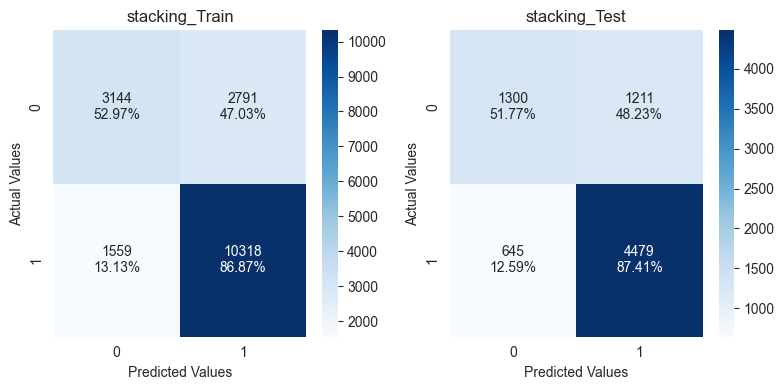

In [602]:
plot_cm_train_test(stacking, X_train, y_train, X_test, y_test, 'stacking_Train', 'Stacking_Test')

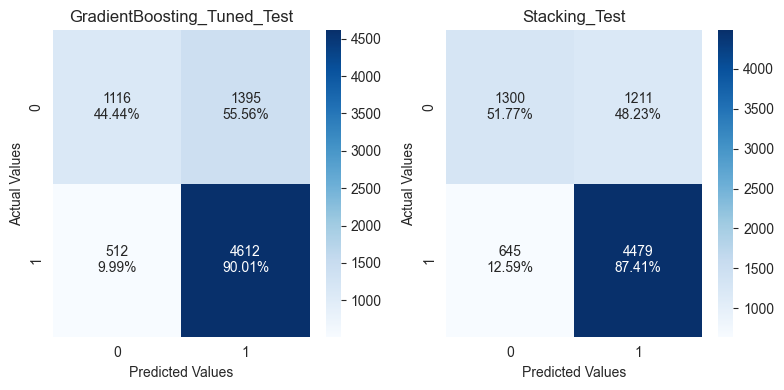

In [603]:
plot_cm_model1_model2(GradientB_tuned,stacking,X_test, X_test, y_test, 'GradientBoosting_Tuned_Test', 'Stacking_Test')

In [598]:
# Initialize models
models_t = {
    "DecisionTree_t": dtree_tuned,
    "Bagging_t": bagging_tuned,
    "RandomForest_t": RForest_tuned,
    "GradientBoosting_t": GradientB_tuned,
    "AdaBoost_t": AdaBoost_tuned,
    "XGBoost_t": XGBoost_tuned,
    "Stacking":stacking
}

# Collect feature importances
feature_importances_t = {}

for model_name, model in models_t.items():
    model.fit(X_train, y_train)
    
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        
    elif hasattr(model, 'estimators_'):  # For Bagging
        importances = np.mean([tree.feature_importances_ for tree in model.estimators_], axis=0)
    
    else:
        continue

    # Ensure the length of importances matches the number of features
    if len(importances) != len(X_train.columns):
        # Pad with zeros
        full_importances = np.zeros(len(X_train.columns))
        used_features = model.estimators_features_[0]  # Get features used in the first base estimator
        full_importances[used_features] = importances
        importances = full_importances
    
    feature_importances_t[model_name] = importances


# Convert to DataFrame
df_feature_importances_t = pd.DataFrame(feature_importances_t, index=X_train.columns)
df_feature_importances_t['mean_importance'] = df_feature_importances_t.mean(axis=1)

# Print the DataFrame
df_feature_importances_t.sort_values('mean_importance',ascending=False)


,DecisionTree_t,Bagging_t,RandomForest_t,GradientBoosting_t,AdaBoost_t,XGBoost_t,Stacking,mean_importance
education_of_employee_High School,0.40,0.08,0.12,0.32,0.15,0.37,0.27,0.25
has_job_experience_Y,0.23,0.06,0.08,0.18,0.11,0.13,0.13,0.13
education_of_employee_Master's,0.06,0.00,0.06,0.11,0.12,0.08,0.08,0.07
education_of_employee_Doctorate,0.05,0.07,0.03,0.06,0.08,0.05,0.05,0.06
prevailing_wage,0.00,0.09,0.17,0.01,0.04,0.01,0.07,0.06
no_of_employees,0.00,0.10,0.17,0.01,0.03,0.01,0.06,0.05
continent_Europe,0.07,0.00,0.02,0.06,0.07,0.05,0.04,0.04
unit_of_wage_Day,0.04,0.07,0.03,0.08,0.03,0.03,0.04,0.04
yr_of_estab,0.00,0.06,0.15,0.01,0.03,0.01,0.05,0.04
unit_of_wage_Year,0.07,0.04,0.02,0.03,0.04,0.06,0.04,0.04


In [599]:
df_feature_importances_t.sort_values('GradientBoosting_t',ascending=False).index[:6].tolist()

['education_of_employee_High School',
 'has_job_experience_Y',
 "education_of_employee_Master's",
 'unit_of_wage_Day',
 'education_of_employee_Doctorate',
 'continent_Europe']

In [600]:
df_feature_importances_t.sort_values('Stacking',ascending=False).index[:6].tolist()

['education_of_employee_High School',
 'has_job_experience_Y',
 "education_of_employee_Master's",
 'prevailing_wage',
 'no_of_employees',
 'yr_of_estab']

In [601]:
df_feature_importances_t.sort_values('XGBoost_t',ascending=False).index[:6].tolist()

['education_of_employee_High School',
 'has_job_experience_Y',
 "education_of_employee_Master's",
 'unit_of_wage_Year',
 'education_of_employee_Doctorate',
 'continent_Europe']

# Notes on Model Performance Comparison and Conclusions
* Tuning the hyperparameters not necesarily improve the model prformance, varing the result case by case
* In this case, all tuned models are giving better performance (higher F1) than default parameters models
* Feature importance vary depending on the model.
* Done a final test, stacking top 3 performance models (GradientB_tuned, XGBoost_tuned and RForest_tuned, with final estimator GradientB_tuned)
* The Stacking model performance is slightly under Gradient Boost performance.
* The model with best performance is Gradient Boost tuned-model
* Top three models share top 3 variables: 'education_of_employee_High School', 'has_job_experience_Y', "education_of_employee_Master's".

# Actionable Insights and Recommendations

* Whith this model, we can correctly indentify 83% of candidates having higher chances of VISA approval.
* As the number of applicants is increasing every year, the implementation of this model will facilitate the process of visa approvals by shortlisting candidates
* The most important factors are related to the foreing worker education and job experience. Another factor with some relevance is the information of continent the employee. Factors like a well stablished employer (since long time) or big companies (with large number of employees) has minor impact.
* The recommended profile for aplicants for whom the visa should be certified consider: 
	* education_of_employee: the candidate having at least High School Diploma, with preference to highers level of education.
	* has_job_experience: the candidate having job experience
	* continent: candidates from Europe have preference
* A no determinant factor is foreign worker's intended region of employment in the US. Noted there are very few applications for the Islands region, therefore, the recommended profile could be adapted in aligment with other US migration offices. For example, if intended to favour inmigration to Island region, the OFLC could consider a more relaxed profile like:
	* education_of_employee: the candidate having at least High School Diploma.
	* has_job_experience: Not mandatory


In [709]:
#create html version
!jupyter nbconvert --to html DSBA_Project_ET_EasyVisa_Fullcode.ipynb

[NbConvertApp] Converting notebook DSBA_Project_ET_EasyVisa_Fullcode.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 44 image(s).
[NbConvertApp] Writing 4375980 bytes to DSBA_Project_ET_EasyVisa_Fullcode.html
